In [18]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [19]:
#importing useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [41]:
#empty the dataframe
ad = pd.DataFrame(None)

In [ ]:
ad.head(2)

In [20]:
#Reading the application data csv file
ad= pd.read_csv('/content/drive/MyDrive/Data Science/Credit EDA Submission/application_data.csv') 
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#checking out the no of rows and columns present in the dataset
ad.shape

(167729, 81)

In [ ]:
#printing out dataframe information
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
ad.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP,POPULATION_DENSITY_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5,pop 4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5,pop 3
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,...,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1,46,4,40-50,<5,pop 4


### Data Cleaning


In [13]:
#check null percentage across columns
round((ad.isnull().sum() * 100/ len(ad)),2).sort_values(ascending=False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [16]:
#identifying columns that have null values percentage greater than 30%; in this case removing all columns having null percentage > 32%
#picking columns having nulls and sorting them in descending order
useless_cols = round(ad.isnull().sum()*100/len(ad),2).sort_values(ascending=False) 
#picking columns having null percentage > 32% only
useless_cols = useless_cols[useless_cols.values > 32] 
useless_cols

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [17]:
#Total no of columns that have null values percentage greater than 30%
len(useless_cols)

49

In [18]:
#drop the columns with null value percentage > 30%
useless_cols = useless_cols.index
ad.drop(labels = useless_cols,axis =1,inplace=True) 

In [19]:
#Rows and columns of new dataframe after dropping the required columns
ad.shape

(307511, 73)

In [20]:
#null percentages in existing columns
ec = round(ad.isnull().sum()*100/len(ad),2).sort_values(ascending=False)
ec.head(20)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_7                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
dtype: float64

In [21]:
#analyzing the contents of column OCCUPATION_TYPE
ad.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
#taking a count of the null values present in the column OCCUPATION_TYPE
ad.OCCUPATION_TYPE.isnull().sum()

96391

In [23]:
#96391 is too big a chunk to impute with the most repeated category Laborers, and so dropping it to keep the data clean
ad = ad[~ad.OCCUPATION_TYPE.isnull()]

In [24]:
ad.shape

(211120, 73)

In [25]:
#taking a count of the null values present in the column EXT_SOURCE_3
ad.EXT_SOURCE_3.isnull().sum()

41857

In [26]:
#41857 is too big a chunk to impute with the most repeated value, and so dropping null values of column EXT_SOURCE_3 to keep the data clean
#ad.EXT_SOURCE_3.mode()
ad = ad[~ad.EXT_SOURCE_3.isnull()]

In [27]:
#taking a count of the null values present in the column NAME_TYPE_SUITE
ad.NAME_TYPE_SUITE.isnull().sum()

752

In [28]:
#752 rows of null values of column NAME_TYPE_SUITE is being removed to keep data clean
ad = ad[~ad.NAME_TYPE_SUITE.isnull()]

In [30]:
#taking a count of the null values present in the column OBS_30_CNT_SOCIAL_CIRCLE
ad.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

513

In [31]:
#513 rows of null values in column OBS_30_CNT_SOCIAL_CIRCLE is being removed to keep data clean
ad = ad[~ad.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]

In [32]:
#taking a count of the null values present in the column EXT_SOURCE_2
ad.EXT_SOURCE_2.isnull().sum()

255

In [33]:
#255 rows of null values is being removed to keep data clean
ad = ad[~ad.EXT_SOURCE_2.isnull()]

In [34]:
#taking a count of the null values present in the column AMT_ANNUITY
ad.AMT_ANNUITY.isnull().sum()

11

In [35]:
#removing 11 null values in column AMT_ANNUITY to keep data clean
ad = ad[~ad.AMT_ANNUITY.isnull()]

In [36]:
# remaining count of rows and columns after removing null values
ad.shape

(167732, 73)

In [37]:
#printing dataframe info after removal of null values
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167732 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   167732 non-null  int64  
 1   TARGET                       167732 non-null  int64  
 2   NAME_CONTRACT_TYPE           167732 non-null  object 
 3   CODE_GENDER                  167732 non-null  object 
 4   FLAG_OWN_CAR                 167732 non-null  object 
 5   FLAG_OWN_REALTY              167732 non-null  object 
 6   CNT_CHILDREN                 167732 non-null  int64  
 7   AMT_INCOME_TOTAL             167732 non-null  float64
 8   AMT_CREDIT                   167732 non-null  float64
 9   AMT_ANNUITY                  167732 non-null  float64
 10  AMT_GOODS_PRICE              167732 non-null  float64
 11  NAME_TYPE_SUITE              167732 non-null  object 
 12  NAME_INCOME_TYPE             167732 non-null  object 
 13 

In [38]:
#understanding the contents of TARGET; nothing to clean
ad.TARGET.value_counts()


0    153525
1     14207
Name: TARGET, dtype: int64

In [39]:
#understanding the contents of CNT_CHILDREN
ad.CNT_CHILDREN.value_counts()


0     106142
1      40476
2      18330
3       2454
4        251
5         53
6          9
7          6
8          2
9          2
12         2
14         2
11         1
10         1
19         1
Name: CNT_CHILDREN, dtype: int64

In [40]:
#understanding the contents of AMT_INCOME_TOTAL
ad.AMT_INCOME_TOTAL.value_counts()


135000.0    19829
112500.0    16253
157500.0    15149
180000.0    14706
225000.0    12574
            ...  
124978.5        1
170041.5        1
105552.0        1
82260.0         1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 1613, dtype: int64

In [41]:
 #understanding the contents of AMT_CREDIT
 ad.AMT_CREDIT.value_counts()
 

450000.0     5930
675000.0     4914
270000.0     4387
225000.0     4316
180000.0     4117
             ... 
1006888.5       1
1689736.5       1
272889.0        1
296671.5        1
711454.5        1
Name: AMT_CREDIT, Length: 4708, dtype: int64

In [42]:
#understanding the contents of AMT_GOODS_PRICE
ad.AMT_GOODS_PRICE.value_counts()

450000.0     15666
675000.0     13467
225000.0     12222
900000.0      9600
270000.0      6661
             ...  
970006.5         1
275760.0         1
391009.5         1
2169000.0        1
453465.0         1
Name: AMT_GOODS_PRICE, Length: 687, dtype: int64

In [43]:
#understanding the contents of CODE_GENDER
ad.CODE_GENDER.value_counts()

F      103737
M       63993
XNA         2
Name: CODE_GENDER, dtype: int64

In [44]:
#remove rows with gender as XNA
ad = ad[~(ad.CODE_GENDER == 'XNA')]

In [45]:
#value_counts() of CODE_GENDER column
ad.CODE_GENDER.value_counts()

F    103737
M     63993
Name: CODE_GENDER, dtype: int64

In [46]:
#creating an integer data type column of CODE_GENDER for numerical based analysis where "F" = 1, "M" = 0
ad['CODE_GENDER_FLAG'] = np.where(ad.CODE_GENDER == "F", 1, 0)

In [47]:
#understanding the contents of FLAG_OWN_CAR
ad.FLAG_OWN_CAR.value_counts()

N    102177
Y     65553
Name: FLAG_OWN_CAR, dtype: int64

In [48]:
#creating an integer data type column called FLAG_OWN_CAR_NUM from FLAG_OWN_CAR for numerical based analysis where "Y" = 1, "N" = 0
ad['FLAG_OWN_CAR_NUM'] = np.where(ad.FLAG_OWN_CAR == "Y", 1, 0)

In [49]:
#creating an integer data type column called FLAG_OWN_REALTY_NUM from FLAG_OWN_REALTY for numerical based analysis where "Y" = 1, "N" = 0
ad['FLAG_OWN_REALTY_NUM'] = np.where(ad.FLAG_OWN_REALTY == "Y", 1, 0)

In [ ]:
#printing head information to check on the newly created columns
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [50]:
#understanding the contents of the categorical data NAME_CONTRACT_TYPE; nothing to clean
ad.NAME_CONTRACT_TYPE.value_counts()

Cash loans         151480
Revolving loans     16250
Name: NAME_CONTRACT_TYPE, dtype: int64

In [51]:
#understanding the contents of the categorical data NAME_TYPE_SUITE; nothing to clean
ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      137288
Family              21102
Spouse, partner      6312
Children             1502
Other_B               928
Other_A               455
Group of people       143
Name: NAME_TYPE_SUITE, dtype: int64

In [52]:
#understanding the contents of the categorical data NAME_INCOME_TYPE; nothing to clean
ad.NAME_INCOME_TYPE.value_counts()

Working                 106018
Commercial associate     46553
State servant            15144
Student                     10
Businessman                  3
Pensioner                    2
Name: NAME_INCOME_TYPE, dtype: int64

In [53]:
#understanding the contents of the categorical data NAME_EDUCATION_TYPE; nothing to clean
ad.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    115721
Higher education                  44476
Incomplete higher                  6010
Lower secondary                    1433
Academic degree                      90
Name: NAME_EDUCATION_TYPE, dtype: int64

In [54]:
#understanding the contents of the categorical data NAME_FAMILY_STATUS; nothing to clean
ad.NAME_FAMILY_STATUS.value_counts()

Married                 111842
Single / not married     24171
Civil marriage           16515
Separated                10769
Widow                     4433
Name: NAME_FAMILY_STATUS, dtype: int64

In [55]:
#understanding the contents of the categorical data NAME_HOUSING_TYPE; nothing to clean
ad.NAME_HOUSING_TYPE.value_counts()

House / apartment      147524
With parents             9172
Municipal apartment      5916
Rented apartment         2909
Office apartment         1517
Co-op apartment           692
Name: NAME_HOUSING_TYPE, dtype: int64

In [56]:
#changing negative values in columns DAYS_BIRTH, etc that starts with DAYS to absolute values using the abs function; working on multiple columns at the same time
get_column_names = [i for i in ad if i.startswith('DAYS')]
ad[get_column_names]= abs(ad[get_column_names])

In [57]:
#checking if columns have positive values; result shows positive values
ad.DAYS_BIRTH.unique()

array([ 9461, 19046, 16941, ..., 23072, 21682, 24185])

In [58]:
#Creating AGE column using DAYS_BIRTH column to know age in years
ad['AGE'] = (ad['DAYS_BIRTH']/365).astype(int)

In [59]:
#Creating Years_Employed column using DAYS_EMPLOYED column to know period of employment in years
ad['YEARS_EMPLOYED'] = (ad['DAYS_EMPLOYED']/365).astype(int)


In [ ]:
#understanding the contents of column YEARS_EMPLOYED; nothing to clean
ad.YEARS_EMPLOYED.value_counts()

1     20188
2     19037
0     17534
3     16489
4     14455
5     10925
6     10148
7      8999
8      7807
9      6221
10     5106
11     4076
12     3682
14     3221
13     3051
15     1884
16     1636
18     1408
17     1385
19     1360
20     1141
21     1035
22      914
23      741
24      677
25      577
26      503
27      495
28      450
29      426
30      326
31      325
34      261
32      248
33      226
35      189
36      146
37      102
39       91
38       86
40       43
41       36
42       27
44       22
43       13
45       12
48        3
46        2
49        1
Name: YEARS_EMPLOYED, dtype: int64

In [60]:
#understanding the contents of the categorical data REGION_RATING_CLIENT; nothing to clean
ad.REGION_RATING_CLIENT.value_counts()

2    124936
3     25677
1     17117
Name: REGION_RATING_CLIENT, dtype: int64

In [61]:
#understanding the contents of the categorical data REGION_RATING_CLIENT_W_CITY; nothing to clean
ad.REGION_RATING_CLIENT_W_CITY.value_counts()


2    126047
3     23398
1     18285
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [62]:
#understanding the contents of the categorical data WEEKDAY_APPR_PROCESS_START; nothing to clean
ad.WEEKDAY_APPR_PROCESS_START.value_counts()


WEDNESDAY    28655
TUESDAY      28469
THURSDAY     27599
FRIDAY       27535
MONDAY       27298
SATURDAY     19159
SUNDAY        9015
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [63]:
#understanding the contents of the categorical data ORGANIZATION_TYPE; nothing to clean
ad.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    42113
Self-employed             25892
Other                      9194
Medicine                   8548
Government                 6958
Business Entity Type 2     6893
School                     6316
Trade: type 7              5608
Kindergarten               5326
Construction               4675
Business Entity Type 1     3830
Transport: type 4          3540
Trade: type 3              2584
Industry: type 9           2403
Security                   2397
Industry: type 3           2324
Housing                    2061
Bank                       1867
Police                     1824
Industry: type 11          1773
Military                   1717
Transport: type 2          1678
Postal                     1645
Agriculture                1567
Trade: type 2              1350
Security Ministries        1324
Restaurant                 1230
Services                   1124
Industry: type 7            898
Transport: type 3           854
University                  847
Industry

In [64]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0


### End of cleaning of application_data.csv #########


### Analysis of variables of application_data.csv

In [7]:
ad.TARGET.describe()

count    599122.000000
mean          0.088244
std           0.283650
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [4]:
ad.TARGET.value_counts(normalize=True)

0    0.915304
1    0.084696
Name: TARGET, dtype: float64

<function matplotlib.pyplot.plot>

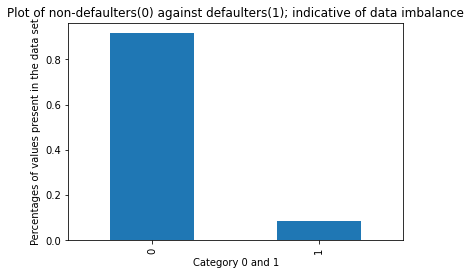

In [3]:
ad.TARGET.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Plot of non-defaulters(0) against defaulters(1); indicative of data imbalance')
plt.xlabel('Category 0 and 1')
plt.ylabel('Percentages of values present in the data set')
plt.plot

Inference: There is data imbalance in the data set as non-defaulters are around 91.5% and defaulters are around 8.5%.

In [65]:
#describing the contents of the column AMT_INCOME_TOTAL; mean and median look close to each other
ad.AMT_INCOME_TOTAL.describe()

count    1.677300e+05
mean     1.791095e+05
std      3.043385e+05
min      2.655000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
#plot of boxplot of column AMT_INCOME_TOTAL shows the presence of the outlier of 117 million
import plotly.express as px
px.box(ad.AMT_INCOME_TOTAL)
#from boxplot it can be inferred that 117 million is definitely an outlier and there has been some mistake with the value; it can be removed. The remaining rows having values greater than 1 million can be retained for sake of analysis.

Output hidden; open in https://colab.research.google.com to view.

In [68]:
#checking the different quantiles to see where the outlier is present
for i in [0.5,0.7,0.9,0.95, .97, 0.98, 0.99]:
  print(f"quantile at {i} is :", np.quantile(ad.AMT_INCOME_TOTAL, i))

quantile at 0.5 is : 157500.0
quantile at 0.7 is : 202500.0
quantile at 0.9 is : 292500.0
quantile at 0.95 is : 360000.0
quantile at 0.97 is : 405000.0
quantile at 0.98 is : 450000.0
quantile at 0.99 is : 540000.0


In [67]:
#analyzing the records of customers with AMT_INCOME_TOTAL > 10000000 (10 million); just one record shows and based on the understanding of the customer's records, it appears like a mistake in the value, so dropping the record.
ad[(ad.AMT_INCOME_TOTAL > 10000000)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762.0,3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,34,2


In [69]:
#outlier with AMT_INCOME_TOTAL of 117000000.0 found in the records; removing the row
ad = ad[~(ad.AMT_INCOME_TOTAL > 10000000)]

In [ ]:
#displaying the records where AMT_INCOME_TOTAL and TARGET value is 1 to observe the data for anamolies; looks good
ad[(ad.AMT_INCOME_TOTAL > 1000000) & ad.TARGET == 1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED
38271,144317,1,Cash loans,F,N,N,0,1125000.0,1006920.0,40063.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.035792,16224,2048,9182.0,5562,1,1,0,1,1,0,Managers,2.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.267461,0.090815,0.0,0.0,0.0,0.0,1863.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,44,5
102626,219132,1,Cash loans,F,Y,Y,0,1305000.0,1339884.0,39307.5,1170000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.002042,15031,825,5103.0,2153,1,1,1,1,1,0,Core staff,2.0,3,3,FRIDAY,15,0,0,0,0,0,0,Kindergarten,0.153804,0.154744,6.0,0.0,6.0,0.0,1544.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,41,2
167656,294352,1,Cash loans,F,N,Y,0,1575000.0,553806.0,28273.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.032561,18777,734,5412.0,2291,1,1,0,1,0,0,High skill tech staff,2.0,1,1,THURSDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.740679,0.291097,0.0,0.0,0.0,0.0,1728.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,1,51,2
173663,301256,1,Cash loans,M,Y,Y,3,1350000.0,491211.0,50463.0,472500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.006008,12174,889,1821.0,3210,1,1,0,1,0,0,Drivers,5.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.583735,0.673830,0.0,0.0,0.0,0.0,218.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1,33,2
196106,327395,1,Cash loans,F,Y,N,2,1350000.0,2517300.0,93420.0,2250000.0,Unaccompanied,Commercial associate,Incomplete higher,Married,House / apartment,0.032561,13042,2629,4175.0,4231,1,1,0,1,0,0,Managers,4.0,1,1,THURSDAY,16,0,0,0,0,0,0,Business Entity Type 1,0.687924,0.171468,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,0.0,1,1,0,35,7
234728,371909,1,Cash loans,M,N,Y,0,1350000.0,576072.0,28017.0,405000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.010276,17099,566,570.0,574,1,1,0,1,0,0,Core staff,2.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.598911,0.362277,0.0,0.0,0.0,0.0,275.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,8.0,0,0,1,46,1
248159,387126,1,Cash loans,F,Y,Y,1,3150000.0,900000.0,48825.0,900000.0,Unaccompanied,State servant,Higher education,Civil marriage,House / apartment,0.032561,13668,1553,2331.0,5943,1,1,1,1,0,0,Private service staff,3.0,1,1,TUESDAY,18,0,0,0,0,0,0,Government,0.754516,0.540654,0.0,0.0,0.0,0.0,585.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,

In [16]:
#binning AMT_INCOME_TOTAL
ad["AMT_INCOME_TOTAL_GROUP"] = pd.cut(ad.AMT_INCOME_TOTAL, [10000,100000,200000,500000,1000000,10000000, 100000000], labels=["<100K", "100K-200K", "200K-500K", "500K-1M", "1M-10M", ">10M"])


In [70]:
 #describing the contents of the column AMT_CREDIT; mean and median looks close to each other
 ad.AMT_CREDIT.describe()
 

count    1.677290e+05
mean     6.205779e+05
std      4.080466e+05
min      4.500000e+04
25%      2.844000e+05
50%      5.286330e+05
75%      8.356050e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [71]:
#boxplot of AMT_CREDIT shows the presence of outliers, but choosing to retain them
import plotly.express as px
px.box(ad.AMT_CREDIT)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#describing the contents of the column AMT_GOODS_PRICE; mean and median looks close to each other
ad.AMT_GOODS_PRICE.describe()


count    1.677290e+05
mean     5.572309e+05
std      3.743613e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.545000e+05
75%      7.020000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
#boxplot of AMT_GOODS_PRICE shows the presence of outliers, but choosing to retain them
import plotly.express as px
px.box(ad.AMT_GOODS_PRICE)

Output hidden; open in https://colab.research.google.com to view.

<function matplotlib.pyplot.plot>

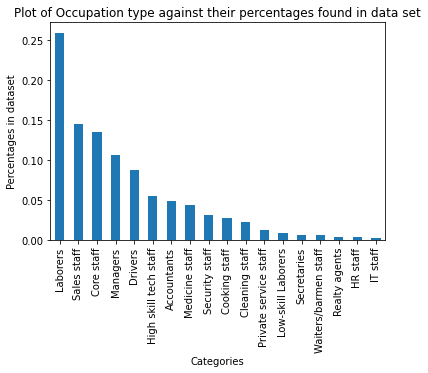

In [5]:
#analyzing the categorical column OCCUPATION_TYPE and verifying the percentage distribution of items
ad.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Plot of Occupation type against their percentages found in data set')
plt.xlabel('Categories')
plt.ylabel('Percentages in dataset')
plt.plot

In [73]:
#checking upon the unique values of the AGE column
ad.AGE.unique()

array([25, 52, 46, 37, 51, 27, 36, 38, 23, 35, 48, 31, 40, 30, 43, 32, 33,
       47, 57, 44, 55, 54, 28, 49, 56, 21, 53, 42, 39, 26, 29, 41, 64, 62,
       45, 50, 59, 34, 22, 24, 58, 63, 61, 60, 65, 68, 67, 66, 69])

In [74]:
#create the AGE_GROUP column and segregate data into the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
ad["AGE_GROUP"] = pd.cut(ad.AGE, [0,30,40,50,60,9999], labels=["<30", "30-40", "40-50", "50-60", "60+"])


<function matplotlib.pyplot.plot>

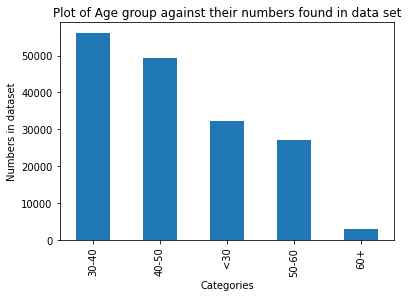

In [6]:
#observing the distribution of data among the items of the categorical column AGE_GROUP by plotting it on a bar graph
ad.AGE_GROUP.value_counts().plot.bar()
plt.title('Plot of Age group against their numbers found in data set')
plt.xlabel('Categories')
plt.ylabel('Numbers in dataset')
plt.plot

<function matplotlib.pyplot.plot>

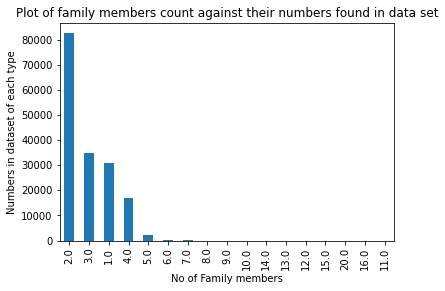

In [7]:
#analyzing the contents of the column CNT_FAM_MEMBERS
ad.CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.title('Plot of family members count against their numbers found in data set')
plt.xlabel('No of Family members')
plt.ylabel('Numbers in dataset of each type')
plt.plot

<function matplotlib.pyplot.plot>

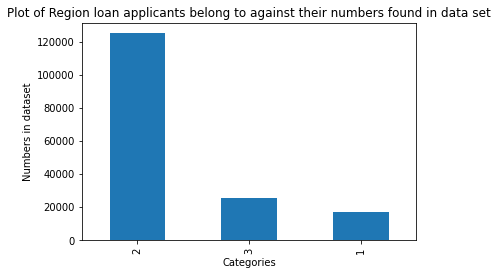

In [9]:
#analyzing the contents of the column REGION_RATING_CLIENT; majority of the applicants are from the region '2'
ad.REGION_RATING_CLIENT.value_counts().plot.bar()
plt.title('Plot of Region loan applicants belong to against their numbers found in data set')
plt.xlabel('Categories')
plt.ylabel('Numbers in dataset')
plt.plot

<function matplotlib.pyplot.plot>

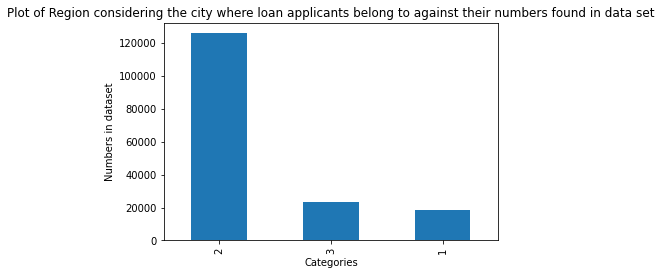

In [10]:
#analyzing the contents of the column REGION_RATING_CLIENT_W_CITY; a majority of the applicants are from the region '2'
ad.REGION_RATING_CLIENT_W_CITY.value_counts().plot.bar()
plt.title('Plot of Region considering the city where loan applicants belong to against their numbers found in data set')
plt.xlabel('Categories')
plt.ylabel('Numbers in dataset')
plt.plot

In [80]:
ad.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      88583
1.0      27192
2.0      16503
3.0      11371
4.0       7871
5.0       5365
6.0       3527
7.0       2435
8.0       1630
9.0       1081
10.0       734
11.0       446
12.0       353
13.0       204
14.0       146
15.0        82
16.0        64
17.0        41
19.0        24
18.0        23
21.0        12
20.0        11
22.0         8
23.0         6
25.0         5
27.0         4
24.0         2
30.0         2
29.0         1
47.0         1
348.0        1
26.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

<function matplotlib.pyplot.plot>

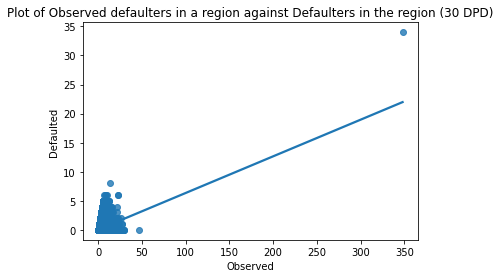

In [12]:
#regression plot to verify if there is any connect between observable and defaulted values of 30 days default.
sns.regplot(x = ad.OBS_30_CNT_SOCIAL_CIRCLE, y = ad.DEF_30_CNT_SOCIAL_CIRCLE, ci = None, data = ad)
#plt.scatter(ad.OBS_30_CNT_SOCIAL_CIRCLE, ad.DEF_30_CNT_SOCIAL_CIRCLE)
plt.title('Plot of Observed defaulters in a region against Defaulters in the region (30 DPD)')
plt.xlabel('Observed')
plt.ylabel('Defaulted')
plt.plot

<function matplotlib.pyplot.plot>

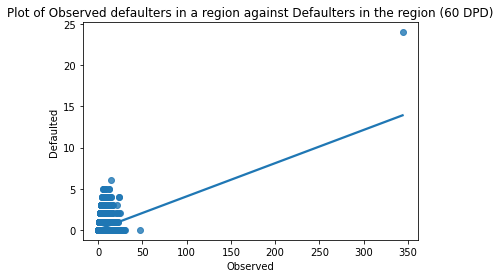

In [13]:
#plt.scatter(ad.OBS_60_CNT_SOCIAL_CIRCLE, ad.DEF_60_CNT_SOCIAL_CIRCLE)
sns.regplot(x = ad.OBS_60_CNT_SOCIAL_CIRCLE, y = ad.DEF_60_CNT_SOCIAL_CIRCLE, ci = None, data = ad)
plt.title('Plot of Observed defaulters in a region against Defaulters in the region (60 DPD)')
plt.xlabel('Observed')
plt.ylabel('Defaulted')
plt.plot

In [82]:
#checking unique values in YEARS_EMPLOYED column
ad.YEARS_EMPLOYED.unique()

array([ 1,  0,  4,  8,  7,  3, 21,  5, 11,  2,  9, 12, 14, 19,  6, 13, 24,
       18, 23, 15, 22, 10, 20, 32, 16, 30, 26, 25, 33, 27, 38, 28, 29, 17,
       31, 34, 40, 35, 36, 39, 37, 41, 42, 43, 44, 48, 45, 46, 49])

In [83]:
ad.YEARS_EMPLOYED.value_counts()

1     20188
2     19036
0     17534
3     16489
4     14455
5     10925
6     10148
7      8999
8      7807
9      6221
10     5106
11     4076
12     3682
14     3221
13     3051
15     1884
16     1636
18     1408
17     1385
19     1360
20     1141
21     1035
22      914
23      741
24      677
25      577
26      503
27      495
28      450
29      426
30      326
31      325
34      261
32      248
33      226
35      189
36      146
37      102
39       91
38       86
40       43
41       36
42       27
44       22
43       13
45       12
48        3
46        2
49        1
Name: YEARS_EMPLOYED, dtype: int64

In [84]:
#binning values in column YEARS_EMPLOYED in new column YEARS_EMPLOYED_GROUP
ad["YEARS_EMPLOYED_GROUP"] = pd.cut(ad.YEARS_EMPLOYED, [-1,5,10,15,20,25, 30, 35, 40, 45,50,55,60,999], labels=["<5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55","55-60", "60+"])

In [85]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5


<function matplotlib.pyplot.plot>

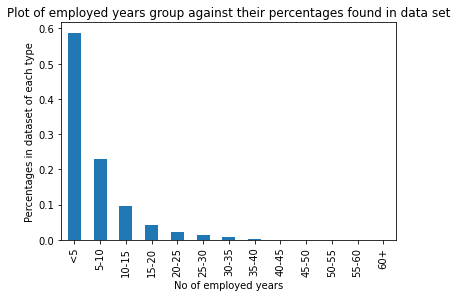

In [14]:
#plotting the values in YEARS_EMPLOYED_GROUP column on a bar graph; it is observed that customers with < 5 years of experience are the major loan applicants
ad.YEARS_EMPLOYED_GROUP.value_counts(normalize=True).plot.bar()
plt.title('Plot of employed years group against their percentages found in data set')
plt.xlabel('No of employed years')
plt.ylabel('Percentages in dataset of each type')
plt.plot

<function matplotlib.pyplot.plot>

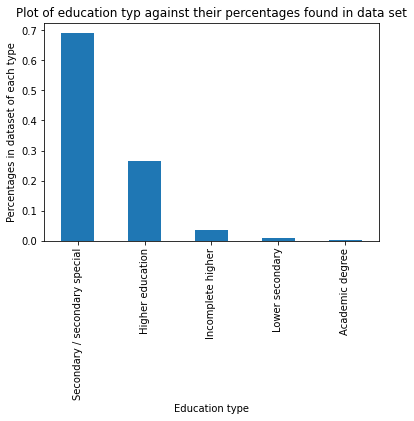

In [15]:
#analysing the contents of the column NAME_EDUCATION_TYPE; it can be observed that customers with secondary education are the top loan applicants
ad.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Plot of education typ against their percentages found in data set')
plt.xlabel('Education type')
plt.ylabel('Percentages in dataset of each type')
plt.plot

<function matplotlib.pyplot.plot>

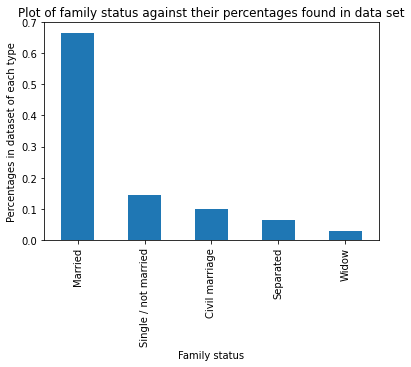

In [16]:
#analyzing the contents of NAME_FAMILY_STATUS column; observed that Married customers are the top loan applicants
ad.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('Plot of family status against their percentages found in data set')
plt.xlabel('Family status')
plt.ylabel('Percentages in dataset of each type')
plt.plot

<function matplotlib.pyplot.plot>

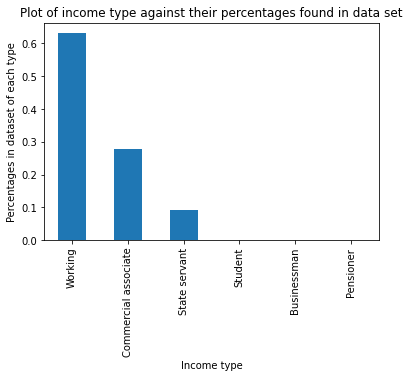

In [17]:
#analyzing the contents of the NAME_INCOME_TYPE column; observed that Working category of customers are the top loan applicants, followed by commercial associate, and state servant
ad.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Plot of income type against their percentages found in data set')
plt.xlabel('Income type')
plt.ylabel('Percentages in dataset of each type')
plt.plot

<function matplotlib.pyplot.plot>

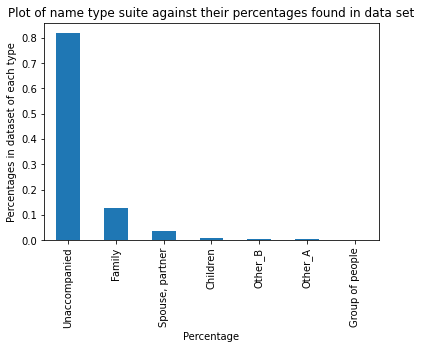

In [18]:
#analyzing the contents of the column NAME_TYPE_SUITE; observed that Unaccompanied category is the highest among loan applicants
ad.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.title('Plot of name type suite against their percentages found in data set')
plt.xlabel('Percentage')
plt.ylabel('Percentages in dataset of each type')
plt.plot

In [ ]:
ad.REGION_POPULATION_RELATIVE.value_counts(normalize=True)

0.035792    0.055333
0.046220    0.044166
0.025164    0.038819
0.030755    0.038515
0.031329    0.038145
              ...   
0.001417    0.001723
0.001333    0.000817
0.000533    0.000089
0.000938    0.000078
0.000290    0.000006
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: float64

<function matplotlib.pyplot.plot>

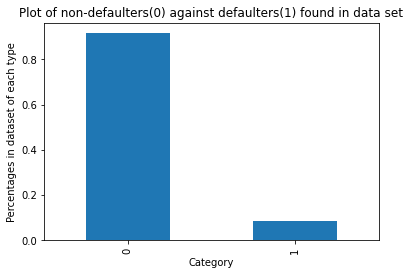

In [19]:
# analyzing the contents of the TARGET column; observed that more than 91% have not defaulted, and its just around 8% or so who have defaulted - data imbalance is seen
ad.TARGET.value_counts(normalize=True).plot.bar()
plt.title('Plot of non-defaulters(0) against defaulters(1) found in data set')
plt.xlabel('Category')
plt.ylabel('Percentages in dataset of each type')
plt.plot

In [17]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP,POPULATION_DENSITY_BINS,DSCR,FLAG_DSCR_ABOVE_1,AMT_INCOME_TOTAL_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5,pop 4,0.683185,0,200K-500K
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5,pop 3,0.833333,0,<100K


###BiVariate Analysis

In [15]:
ad.AMT_INCOME_TOTAL.min()

26550.0

In [21]:
#creating a colum DSCR which holds the calculation of the following formula to find Debt Service Coverage Ratio
ad["DSCR"] = ad.AMT_INCOME_TOTAL / (ad.AMT_ANNUITY *12)

In [7]:
ad.DSCR.unique()

array([0.68318455, 0.83333333, 0.29980921, ..., 0.74152542, 0.42529771,
       0.70527097])

In [22]:
#ad[ad.DSCR < 1]
#grouping DSCR values into 1 for values 1 and above, and 0 for values below 1.
ad['FLAG_DSCR_ABOVE_1'] = np.where(ad.DSCR >= 1 , 1, 0)

<function matplotlib.pyplot.plot>

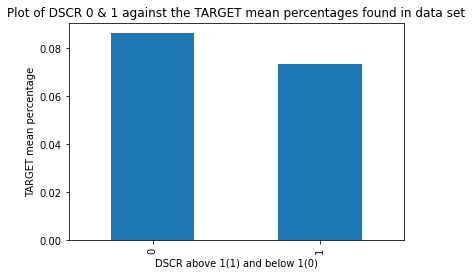

In [23]:
#plotting DSCR whether <1(0) or >=1(1) against the TARGET's mean for those values; figuring out whether people with DSCR lesser than 1 have actually defaulted. 
ad.groupby("FLAG_DSCR_ABOVE_1")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of DSCR 0 & 1 against the TARGET mean percentages found in data set')
plt.xlabel('DSCR above 1(1) and below 1(0)')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

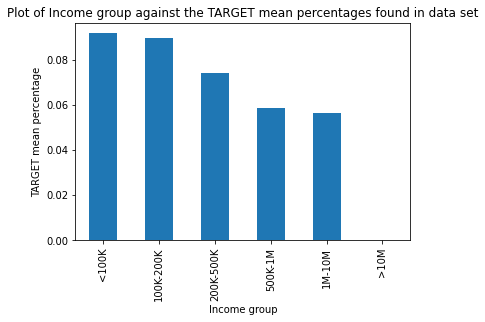

In [24]:
#analyzing which income groups have defaulted on their loans; customers with income less than 100K and also incomes between 100K-200K have major defaults.
ad.groupby("AMT_INCOME_TOTAL_GROUP")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Income group against the TARGET mean percentages found in data set')
plt.xlabel('Income group')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

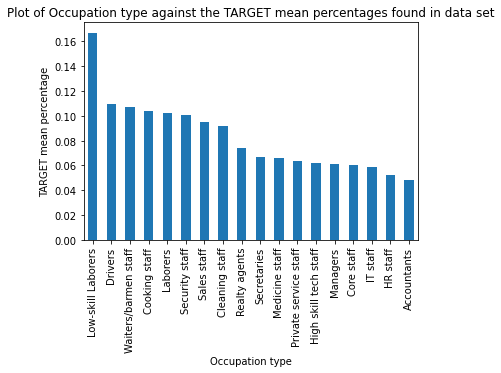

In [25]:
#analyzing which occupation type has had the most default in payment; low-skill laborers has the most defaults, and accountants have the least defaults.
ad.groupby("OCCUPATION_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Occupation type against the TARGET mean percentages found in data set')
plt.xlabel('Occupation type')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

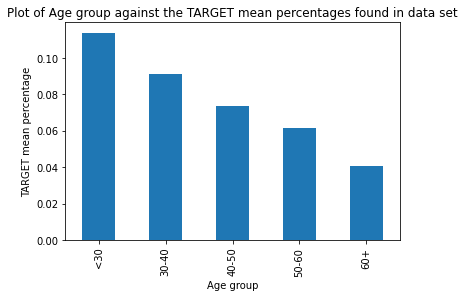

In [26]:
#analyzing which age group has the most payment defaults; <30 years has the most default.
ad.groupby("AGE_GROUP")["TARGET"].mean().plot.bar()
plt.title('Plot of Age group against the TARGET mean percentages found in data set')
plt.xlabel('Age group')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

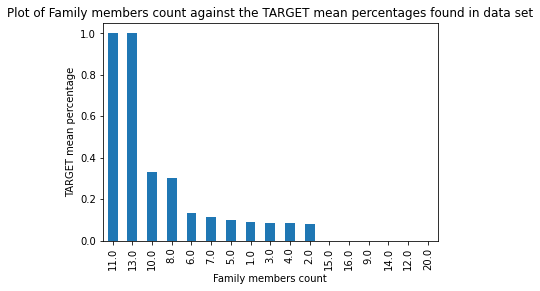

In [27]:
#analyzing count of family members and loan default; it can be seen that defaults are from households with high family count.
ad.groupby("CNT_FAM_MEMBERS")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Family members count against the TARGET mean percentages found in data set')
plt.xlabel('Family members count')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

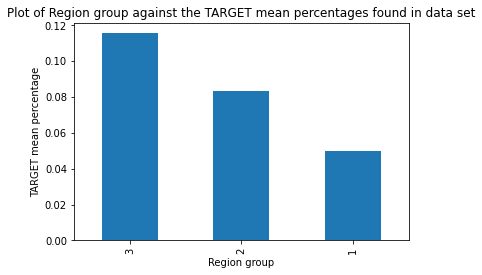

In [28]:
#analyzing region for payment default; customers from region 3 have the highest loan defaults.
ad.groupby("REGION_RATING_CLIENT")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Region group against the TARGET mean percentages found in data set')
plt.xlabel('Region group')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

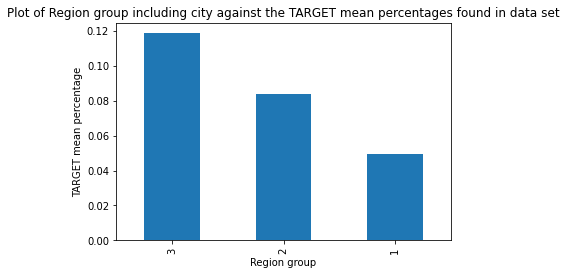

In [29]:
#analyzing region for payment default; customers from region 3 have the highest loan defaults.
ad.groupby("REGION_RATING_CLIENT_W_CITY")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Region group including city against the TARGET mean percentages found in data set')
plt.xlabel('Region group')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

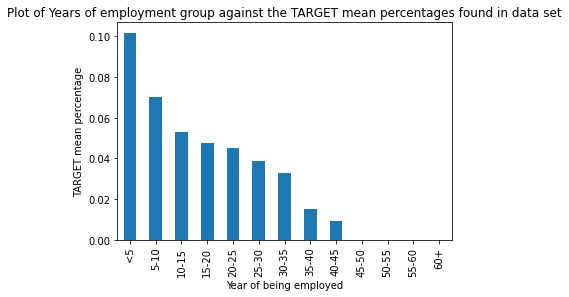

In [30]:
#analyzing years of employment for payment default; customers having less than 5 years of work experience have highest loan defaults.
ad.groupby("YEARS_EMPLOYED_GROUP")["TARGET"].mean().plot.bar()
plt.title('Plot of Years of employment group against the TARGET mean percentages found in data set')
plt.xlabel('Year of being employed')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

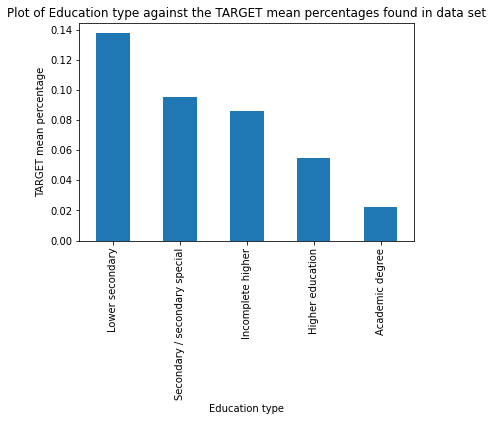

In [31]:
##analyzing education type for payment default; customers with lower secondary education have the highest loan defaults.
ad.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Education type against the TARGET mean percentages found in data set')
plt.xlabel('Education type')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

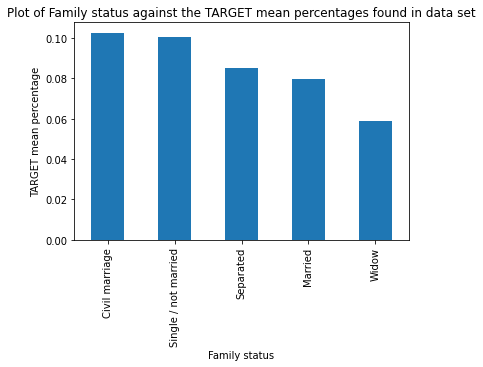

In [32]:
#analyzing family status for payment default; customers who had civil marriage have the highest loan defaults, followed closely by single/not married.
ad.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Family status against the TARGET mean percentages found in data set')
plt.xlabel('Family status')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

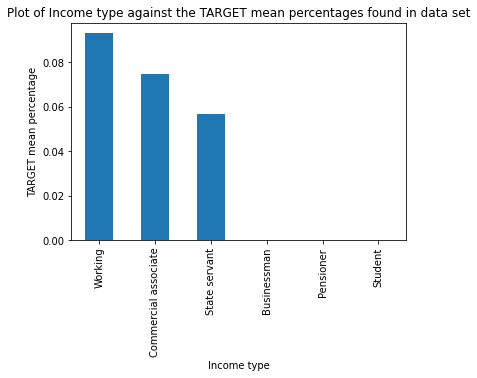

In [33]:
#analyzing income type for payment default; customers under Working type have the highest loan defaults, followed by commercial associate, and state servant.
ad.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Income type against the TARGET mean percentages found in data set')
plt.xlabel('Income type')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

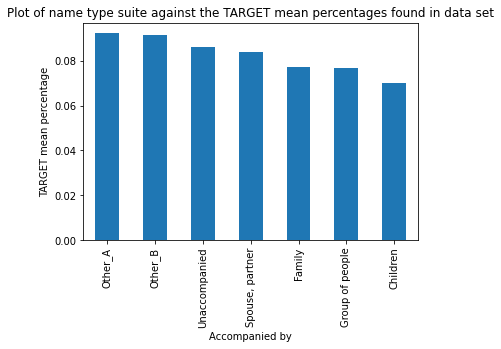

In [34]:
#analyzing who accompanied customer at the time of loan application for payment default; customers across all categories have significant defaults.
ad.groupby("NAME_TYPE_SUITE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of name type suite against the TARGET mean percentages found in data set')
plt.xlabel('Accompanied by')
plt.ylabel('TARGET mean percentage')
plt.plot

In [ ]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5


<function matplotlib.pyplot.plot>

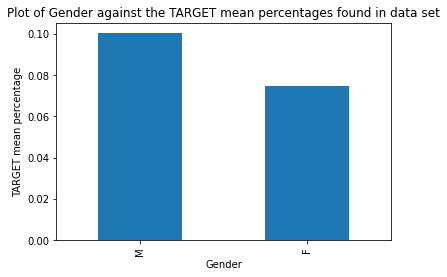

In [35]:
#analyzing gender for payment default; male customers have the highest loan defaults.
ad.groupby("CODE_GENDER")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Gender against the TARGET mean percentages found in data set')
plt.xlabel('Gender')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

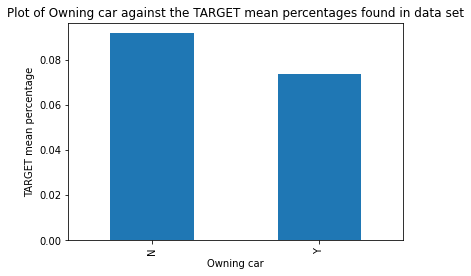

In [36]:
#analyzing customers who own a car for payment default; customers who do not own a car have the highest loan defaults.
ad.groupby("FLAG_OWN_CAR")["TARGET"].mean().plot.bar()
plt.title('Plot of Owning car against the TARGET mean percentages found in data set')
plt.xlabel('Owning car')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

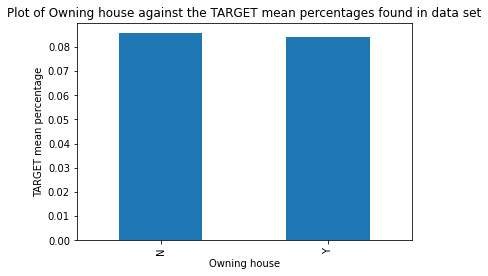

In [37]:
#analyzing customers who own a house for payment default; customers not having a house have the highest loan defaults; however customers who own a house have also defaulted to a very close extent.
ad.groupby("FLAG_OWN_REALTY")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Owning house against the TARGET mean percentages found in data set')
plt.xlabel('Owning house')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

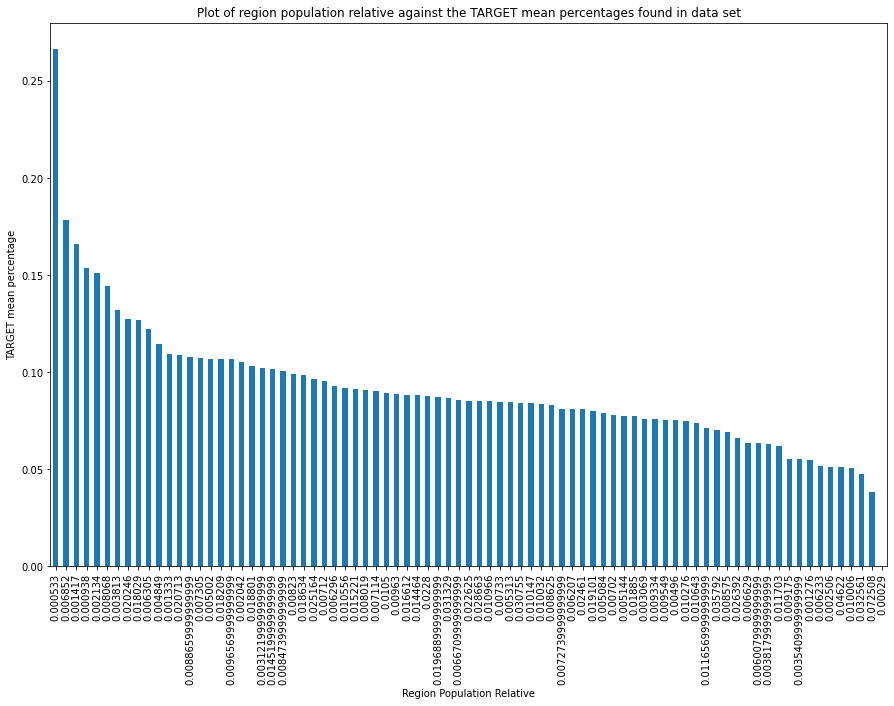

In [38]:
#analyzing population density of a region for payment default; customers across regions have defaulted, but one region has significantly high defaults.
plt.figure(figsize = [15,10])
ad.groupby("REGION_POPULATION_RELATIVE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.title('Plot of region population relative against the TARGET mean percentages found in data set')
plt.xlabel('Region Population Relative')
plt.ylabel('TARGET mean percentage')
plt.plot

In [ ]:
sor = sorted(ad.REGION_POPULATION_RELATIVE.unique())
sor

In [10]:
#binning contents of column REGION_POPULATION_RELATIVE into different bins
ad["POPULATION_DENSITY_BINS"] = pd.cut(ad.REGION_POPULATION_RELATIVE, [.00029,0.0060079999999999,0.0088659999999999,0.018029,0.072508], labels=["pop 1", "pop 2", "pop 3", "pop 4"])

<function matplotlib.pyplot.plot>

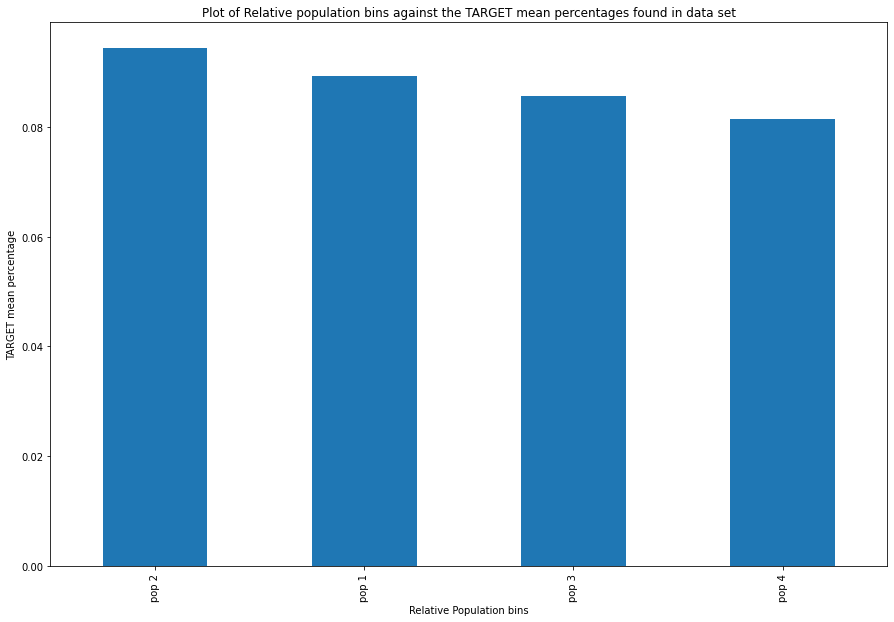

In [39]:
#analyzing population density bins for payment default; customers across all bins have defaulted, but pop 2 bin has significantly high defaults.
plt.figure(figsize = [15,10])
ad.groupby("POPULATION_DENSITY_BINS")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.title('Plot of Relative population bins against the TARGET mean percentages found in data set')
plt.xlabel('Relative Population bins')
plt.ylabel('TARGET mean percentage')
plt.plot

In [ ]:
ad.REGION_POPULATION_RELATIVE.value_counts(normalize=True)

0.035792    0.055333
0.046220    0.044166
0.025164    0.038819
0.030755    0.038515
0.031329    0.038145
              ...   
0.001417    0.001723
0.001333    0.000817
0.000533    0.000089
0.000938    0.000078
0.000290    0.000006
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: float64

###Multvariate Analysis

In [ ]:
#analyzing content of TARGET column
ad.TARGET.value_counts(normalize=True)

0    0.915304
1    0.084696
Name: TARGET, dtype: float64

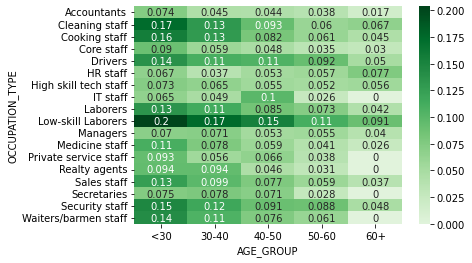

In [ ]:
#heatmap of variables OCCUPATION_TYPE, AGE_GROUP, and TARGET; low-skill laborers across age groups have considerable loan defaults, closely followed by laborers
res = pd.pivot_table(data=ad, index="OCCUPATION_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

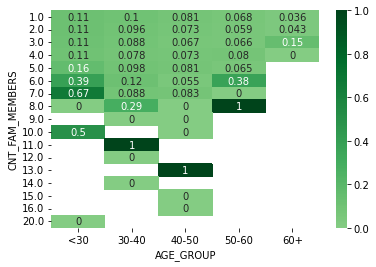

In [ ]:
#heatmap of variables CNT_FAM_MEMBERS, AGE_GROUP, and TARGET; high family members count have considerable loan defaults.
res = pd.pivot_table(data=ad, index="CNT_FAM_MEMBERS", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

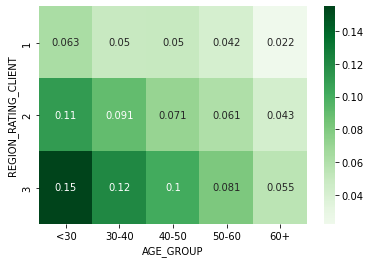

In [ ]:
#heatmap of variables REGION_RATING_CLIENT, AGE_GROUP, and TARGET; customers from region 3 across age groups have loan defaults; customers from region 2 in the age group of <30 and 30-40 are prone to default.
res = pd.pivot_table(data=ad, index="REGION_RATING_CLIENT", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

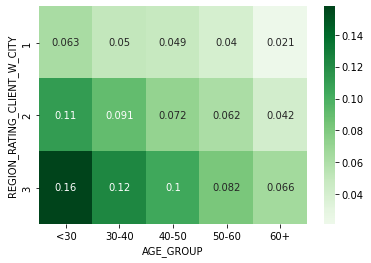

In [ ]:
#heatmap of variables REGION_RATING_CLIENT_W_CITY, AGE_GROUP, and TARGET; customers from region 3 across age groups have loan defaults; customers from region 2 in the age group of <30 and 30-40 are prone to default.
res = pd.pivot_table(data=ad, index="REGION_RATING_CLIENT_W_CITY", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

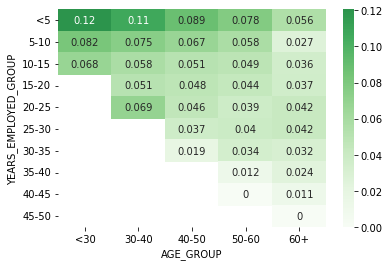

In [ ]:
#heatmap of variables YEARS_EMPLOYED_GROUP, AGE_GROUP, and TARGET; customers who have less than 5 years of employment tend to default on payments.
res = pd.pivot_table(data=ad, index="YEARS_EMPLOYED_GROUP", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

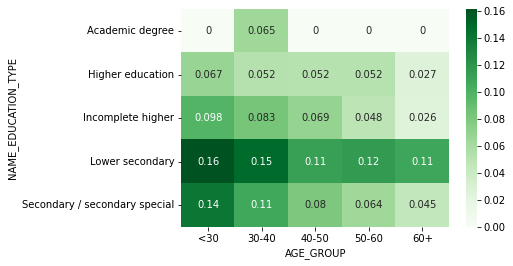

In [ ]:
#heatmap of variables NAME_EDUCATION_TYPE, AGE_GROUP, and TARGET; customers who have lower secondary education have a tendency to default on payments across age groups; customers with secondary/secondary special education in the age groups of <30 and 30-40 tend to default.
res = pd.pivot_table(data=ad, index="NAME_EDUCATION_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

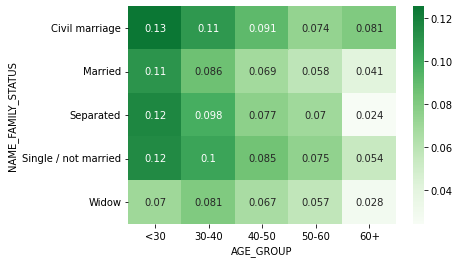

In [ ]:
#heatmap of variables NAME_FAMILY_STATUS, AGE_GROUP, and TARGET; customers who are <30 tend to default across every family status; there is a fair chance to default in the 30-40 age group as well
res = pd.pivot_table(data=ad, index="NAME_FAMILY_STATUS", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

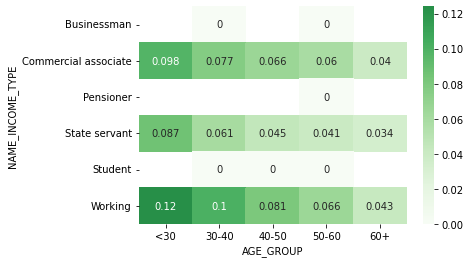

In [ ]:
#heatmap of variables NAME_INCOME_TYPE, AGE_GROUP, and TARGET; customers who are in the age group <30 and 30-40 and are in the income type 'working' tend to default.
res = pd.pivot_table(data=ad, index="NAME_INCOME_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

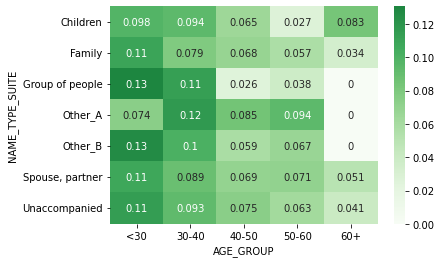

In [ ]:
#heatmap of variables NAME_TYPE_SUITE, AGE_GROUP, and TARGET; customers who are in the age group <30 tend to default and it does not matter who accompanied them; customers who were accompanied by Other_A have a lesser chance to default.
res = pd.pivot_table(data=ad, index="NAME_TYPE_SUITE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

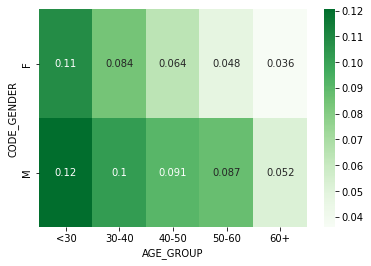

In [103]:
#heatmap of variables CODE_GENDER, AGE_GROUP, and TARGET; male customers across age groups tend to default, while females <30 years of age have a tendency to default.
res = pd.pivot_table(data=ad, index="CODE_GENDER", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

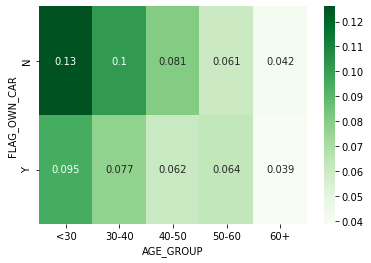

In [104]:
#heatmap of variables FLAG_OWN_CAR, AGE_GROUP, and TARGET; customers who do not own a car tend to default who are in the agegroups <30 and 30-40
res = pd.pivot_table(data=ad, index="FLAG_OWN_CAR", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

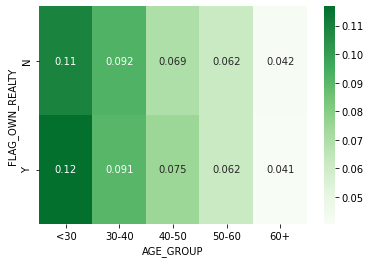

In [105]:
#heatmap of variables FLAG_OWN_REALTY, AGE_GROUP, and TARGET; customers who own or do not own a house and in the age groups of <30 and 30-40 have a tendency to default.
res = pd.pivot_table(data=ad, index="FLAG_OWN_REALTY", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

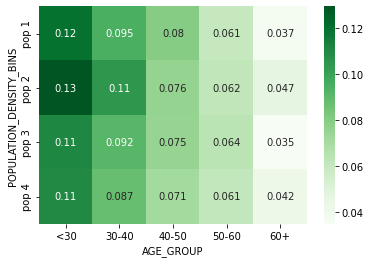

In [13]:
#heatmap of variables POPULATION_DENSITY_BINS, AGE_GROUP, and TARGET; customers across all population bins in the age group of <30 tend to default with pop 2 having the highest defaults.
#plt.figure(figsize = [20,15])
res = pd.pivot_table(data=ad, index="POPULATION_DENSITY_BINS", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

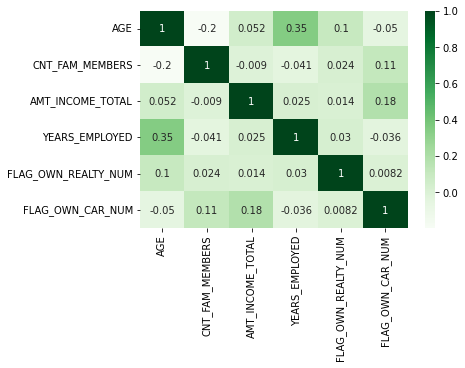

In [40]:
#correlationship matrix among variables AGE, CNT_FAM_MEMBERS, AMT_INCOME_TOTAL, YEARS_EMPLOYED, FLAG_OWN_REALTY_NUM, and FLAG_OWN_CAR_NUM.
sns.heatmap(ad[["AGE", "CNT_FAM_MEMBERS","AMT_INCOME_TOTAL", "YEARS_EMPLOYED","FLAG_OWN_REALTY_NUM" , "FLAG_OWN_CAR_NUM"]].corr(), annot=True, cmap="Greens")

In [ ]:
ad.CODE_GENDER_FLAG.value_counts()[0]

63993

In [ ]:
ad[(ad.CODE_GENDER_FLAG == 0) & (ad.TARGET == 1)].count()[0]

6426

In [ ]:
100*(ad[(ad.CODE_GENDER_FLAG == 0) & (ad.TARGET == 1)].count()[0]) / (ad.CODE_GENDER_FLAG.value_counts()[0])

10.041723313487413

In [ ]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5


### Start of cleaning of previous_application.csv ########

In [56]:
pa = pd.DataFrame(None)

In [ ]:
pa.head()

In [16]:
pa.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low


In [29]:
pa.shape

(1242162, 26)

In [18]:
pa = pd.read_csv('/content/drive/MyDrive/Data Science/Credit EDA Submission/previous_application.csv') 

In [19]:
pa.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [20]:
pa.shape

(1670214, 37)

In [21]:
#check null percentage across columns
round((pa.isnull().sum() * 100/ len(pa)),2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [22]:
pa.RATE_DOWN_PAYMENT.value_counts()

0.000000    369854
0.108909     36341
0.217818      6482
0.326727      1081
0.544545       746
             ...  
0.217822         1
0.217849         1
0.088663         1
0.155522         1
0.101401         1
Name: RATE_DOWN_PAYMENT, Length: 207033, dtype: int64

In [23]:
pa.RATE_INTEREST_PRIVILEGED.value_counts()


0.835095    1717
0.715645    1046
0.637949    1039
0.867336     931
0.852537     876
0.568710     127
0.424419      66
0.513742      45
0.832452      40
0.845137      19
0.637421       7
0.644820       7
0.780655       6
0.725159       5
0.790698       5
0.806554       4
0.373150       2
0.436575       2
0.548097       1
0.484144       1
0.542812       1
1.000000       1
0.502114       1
0.820825       1
0.854651       1
Name: RATE_INTEREST_PRIVILEGED, dtype: int64

In [24]:
pa.RATE_INTEREST_PRIMARY.value_counts()


0.189136    1218
0.142440     951
0.160716     821
0.193330     681
0.196900     573
            ... 
0.182378       1
0.691800       1
0.258855       1
0.739714       1
0.654270       1
Name: RATE_INTEREST_PRIMARY, Length: 148, dtype: int64

In [25]:
useless_cols = round(pa.isnull().sum()*100/len(pa),2).sort_values(ascending=False)
useless_cols = useless_cols[useless_cols.values > 40]
useless_cols


RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
RATE_DOWN_PAYMENT            53.64
AMT_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
dtype: float64

In [26]:
#Total no of columns that have null values percentage greater than 30%
len(useless_cols)


11

In [27]:
#drop the columns with null value percentage > 40%
useless_cols = useless_cols.index
pa.drop(labels = useless_cols,axis =1,inplace=True)

In [28]:
pa.shape

(1670214, 26)

In [29]:
#removing 333855 rows where all the three columns AMT_GOODS_PRICE, AMT_ANNUITY, and CNT_PAYMENT are null
pa = pa[~(pa.AMT_GOODS_PRICE.isnull() & pa.AMT_ANNUITY.isnull() & pa.CNT_PAYMENT.isnull())]
              

In [30]:
#dropping rows where CNT_PAYMENT is null
pa = pa[~pa.CNT_PAYMENT.isnull()]

In [31]:
pa.shape

(1297984, 26)

In [32]:
#dropping rows where AMT_ANNUITY is null
pa = pa[~pa.AMT_ANNUITY.isnull()]

In [33]:
pa.shape

(1297979, 26)

In [34]:
#dropping 51659 rows where AMT_GOODS_PRICE is null
pa = pa[~pa.AMT_GOODS_PRICE.isnull()]

In [4]:
pa.shape

(1242162, 26)

### Data Cleansing of previous_application.csv data is complete !

### Data Analysis of previous application data begins!

In [36]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246320 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1246320 non-null  int64  
 1   SK_ID_CURR                   1246320 non-null  int64  
 2   NAME_CONTRACT_TYPE           1246320 non-null  object 
 3   AMT_ANNUITY                  1246320 non-null  float64
 4   AMT_APPLICATION              1246320 non-null  float64
 5   AMT_CREDIT                   1246320 non-null  float64
 6   AMT_GOODS_PRICE              1246320 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1246320 non-null  object 
 8   HOUR_APPR_PROCESS_START      1246320 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1246320 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1246320 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1246320 non-null  object 
 12  NAME_CONTRACT_STATUS         1246320 non-n

In [37]:
#understanding the contents of the categorical data FLAG_LAST_APPL_PER_CONTRACT; it is best to retain only applications of previous contract and drop everything else which is a clerical mistake
pa.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1242858
N       3462
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [38]:
#remove records that are not part of previous application only
pa = pa[~(pa.FLAG_LAST_APPL_PER_CONTRACT == 'N')]

In [39]:
pa.shape

(1242858, 26)

In [ ]:
#understanding the contents of the categorical data NFLAG_LAST_APPL_IN_DAY; it is best to retain only applications that are last application of the day and drop the rest
pa.NFLAG_LAST_APPL_IN_DAY.value_counts()

1    1242162
0        696
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [40]:
#removing rows that are not the last application of the day
pa = pa[~(pa.NFLAG_LAST_APPL_IN_DAY == 0)]


In [4]:
pa.shape

(1242162, 26)

In [ ]:
#understanding the contents of the categorical data NAME_CASH_LOAN_PURPOSE; retaining as is as loan purpose unknown is considerably highest and identified as XAP and XNA
pa.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 781005
XNA                                 391849
Repairs                              23683
Other                                15480
Urgent needs                          8393
Buying a used car                     2872
Building a house or an annex          2693
Everyday expenses                     2390
Medicine                              2167
Payments on other loans               1923
Education                             1566
Journey                               1233
Purchase of electronic equipment      1054
Buying a new car                      1006
Wedding / gift / holiday               956
Buying a home                          862
Car repairs                            797
Furniture                              747
Buying a holiday home / land           533
Business development                   425
Gasification / water supply            298
Buying a garage                        135
Hobby                                   55
Money for a

In [12]:
#understanding the contents of DAYS_DECISION
pa.DAYS_DECISION.value_counts()

-364     1251
-329     1211
-238     1196
-352     1195
-245     1185
         ... 
-2886     128
-2922     127
-2921     123
-2902     122
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [16]:
#using abs to make the column data into positive values
pa.DAYS_DECISION = abs(pa.DAYS_DECISION)

In [48]:
#converting days to years to handle data better
pa['YEARS_DECISION'] = (pa['DAYS_DECISION']/365).astype(int)

In [49]:
pa.YEARS_DECISION.unique()

array([0, 1, 2, 4, 5, 7, 3, 6, 8])

In [52]:
#binning years to analyze the contents better
pa["YEARS_DECISION_GROUP"] = pd.cut(pa.YEARS_DECISION, [-1,1,2,3,4,5, 6, 7, 999], labels=["0-1", "1-2", "2-3", "3-4", "4-5","5-6","6-7","7-8"])


In [54]:
pa["YEARS_DECISION_GROUP"].unique()

['0-1', '1-2', '3-4', '4-5', '6-7', '2-3', '5-6', '7-8']
Categories (8, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5' < '5-6' < '6-7' < '7-8']

In [53]:
pa.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION,YEARS_DECISION_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0,0-1
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0,0-1


In [ ]:
#understanding the contents of NAME_PAYMENT_TYPE
pa.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        996327
XNA                                          236644
Non-cash from your account                     8121
Cashless from the account of the employer      1070
Name: NAME_PAYMENT_TYPE, dtype: int64

In [ ]:
#understanding the contents of CODE_REJECT_REASON; XAP indicates 'not applicable' which means approved loans and XNA could be 'not available'
pa.CODE_REJECT_REASON.value_counts()

XAP       1003766
HC         139081
LIMIT       49957
SCO         34942
SCOFR        7906
VERIF        3341
XNA          2236
CLIENT        910
SYSTEM         23
Name: CODE_REJECT_REASON, dtype: int64

In [ ]:
#understanding the contents of NAME_CLIENT_TYPE
pa.NAME_CLIENT_TYPE.value_counts()

Repeater     840301
New          294395
Refreshed    106569
XNA             897
Name: NAME_CLIENT_TYPE, dtype: int64

In [ ]:
#understanding the contents of NAME_GOODS_CATEGORY
pa.NAME_GOODS_CATEGORY.value_counts()

XNA                         559366
Mobile                      200285
Consumer Electronics        119940
Computers                    99936
Audio/Video                  97729
Furniture                    53260
Construction Materials       24852
Clothing and Accessories     23401
Photo / Cinema Equipment     23152
Auto Accessories              7149
Jewelry                       6260
Homewares                     4997
Medical Supplies              3836
Vehicles                      3330
Sport and Leisure             2945
Gardening                     2652
Other                         2554
Office Appliances             2292
Tourism                       1650
Medicine                      1547
Direct Sales                   445
Fitness                        209
Additional Service             128
Education                      107
Weapon                          76
Insurance                       62
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [ ]:
#understanding the contents of NAME_PORTFOLIO
pa.NAME_PORTFOLIO.value_counts()

POS      690743
Cash     461157
Cards     89837
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [ ]:
#understanding the contents of NAME_PRODUCT_TYPE
pa.NAME_PRODUCT_TYPE.value_counts()

XNA        691168
x-sell     400829
walk-in    150165
Name: NAME_PRODUCT_TYPE, dtype: int64

In [ ]:
#understanding the contents of CHANNEL_TYPE
pa.CHANNEL_TYPE.value_counts()

Country-wide                  447479
Credit and cash offices       393610
Stone                         207563
Regional / Local              105854
AP+ (Cash loan)                46556
Contact center                 34666
Channel of corporate sales      5982
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [ ]:
#understanding the contents
pa.SELLERPLACE_AREA.value_counts()

-1        419895
 0         39876
 50        33617
 30        29806
 20        29745
           ...  
 1849          1
 719           1
 1292          1
 11081         1
 4242          1
Name: SELLERPLACE_AREA, Length: 2091, dtype: int64

In [ ]:
#understanding the contents of NAME_SELLER_INDUSTRY
pa.NAME_SELLER_INDUSTRY.value_counts()

XNA                     482437
Consumer electronics    383848
Connectivity            237337
Furniture                57016
Construction             29561
Clothing                 23781
Industry                 19004
Auto technology           4967
Jewelry                   2707
MLM partners               991
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [ ]:
#understanding the contents of CNT_PAYMENT
pa.CNT_PAYMENT.value_counts()

12.0    322848
6.0     190376
10.0    141815
24.0    137646
0.0      89837
18.0     77368
36.0     72527
60.0     53575
48.0     47273
8.0      30348
4.0      26913
30.0     16901
14.0      8251
42.0      7127
16.0      5709
5.0       3957
54.0      2103
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [ ]:
#understanding the contents NAME_YIELD_GROUP
pa.NAME_YIELD_GROUP.value_counts()

middle        385170
high          353195
low_normal    321961
low_action     91999
XNA            89837
Name: NAME_YIELD_GROUP, dtype: int64

In [ ]:
#understanding the contents of PRODUCT_COMBINATION
pa.PRODUCT_COMBINATION.value_counts()

POS household with interest       257754
POS mobile with interest          190465
Cash X-Sell: middle               143677
Cash X-Sell: low                  130170
POS industry with interest         98110
POS household without interest     82878
Cash Street: high                  59604
Cash X-Sell: high                  59247
Card Street                        51444
Card X-Sell                        38393
Cash Street: middle                34632
Cash Street: low                   33827
POS mobile without interest        24074
POS other with interest            22735
POS industry without interest      12598
POS others without interest         2554
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
pa.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.242162e+06,1.242162e+06,1.242162e+06,1.242162e+06,1.242162e+06,1.242162e+06,1.242162e+06,1242162.0,1.242162e+06,1.242162e+06,1.242162e+06
mean,1.913724e+06,2.783531e+05,1.606094e+04,2.322120e+05,2.488427e+05,2.322120e+05,1.258382e+01,1.0,1.023868e+03,4.067021e+02,1.676425e+01
std,5.341168e+05,1.027798e+05,1.493506e+04,3.187644e+05,3.467214e+05,3.187644e+05,3.326481e+00,0.0,7.868743e+02,8.259840e+03,1.448017e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.446770e+06,1.893710e+05,6.331016e+03,5.209650e+04,5.139000e+04,5.209650e+04,1.000000e+01,1.0,3.860000e+02,-1.000000e+00,6.000000e+00
50%,1.909892e+06,2.787335e+05,1.125000e+04,1.125000e+05,1.157310e+05,1.125000e+05,1.200000e+01,1.0,7.690000e+02,2.700000e+01,1.200000e+01
75%,2.377931e+06,3.673690e+05,2.059888e+04,2.475000e+05,2.700000e+05,2.475000e+05,1.500000e+01,1.0,1.538000e+03,1.460000e+02,2.400000e+01
max,2.845379e+06,4.562550e+05,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.0,2.922000e+03,4.000000e+06,8.400000e+01


In [43]:
# Merge ad with pa into ad1 using left merge; creating a dataframe ad1
ad = pd.merge(left=ad,right=pa, how ="left", left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [60]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP,POPULATION_DENSITY_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION,YEARS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.0,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5,pop 4,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,1.0,0-1
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.0,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5,pop 3,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,2.0,1-2


In [30]:
#displaying info of merged dataframe
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599122 entries, 0 to 599121
Columns: 106 entries, SK_ID_CURR to PRODUCT_COMBINATION
dtypes: category(3), float64(30), int64(46), object(27)
memory usage: 477.1+ MB


In [50]:
#checking to see if there are nulls in the merged dataframe; there are no nulls found
round((pa.isnull().sum() * 100/ len(pa)),2).sort_values(ascending=False)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64

<function matplotlib.pyplot.plot>

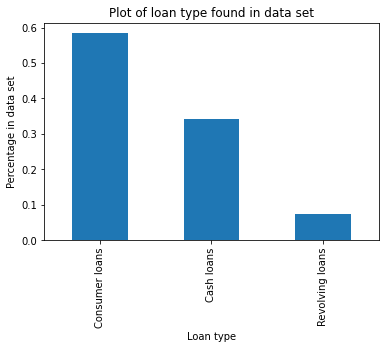

In [44]:
#analysing contents of NAME_CONTRACT_TYPE_y
ad.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.bar()
plt.title('Plot of loan type found in data set')
plt.xlabel('Loan type')
plt.ylabel('Percentage in data set')
plt.plot

<function matplotlib.pyplot.plot>

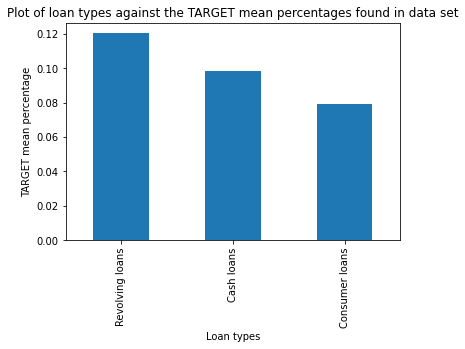

In [45]:
#analyzing the previous contract type of customers who have defaulted in current application; customers who had previously taken revolving loans have defaulted the most.
ad.groupby("NAME_CONTRACT_TYPE_y")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of loan types against the TARGET mean percentages found in data set')
plt.xlabel('Loan types')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

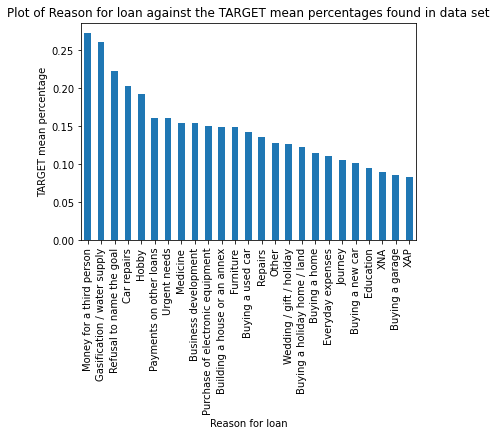

In [46]:
#analyzing the purpose of the previous loan application of those who have defaulted in current application
ad.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Reason for loan against the TARGET mean percentages found in data set')
plt.xlabel('Reason for loan')
plt.ylabel('TARGET mean percentage')
plt.plot

<function matplotlib.pyplot.plot>

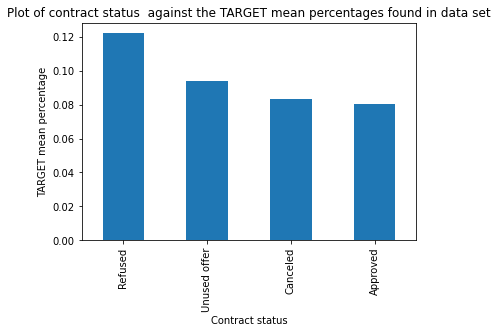

In [48]:
#analyzing contract status of previous application who have defaulted in current application, and those who had 'refused' the loan have defaulted on payments in the current application
ad.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of contract status  against the TARGET mean percentages found in data set')
plt.xlabel('Contract status')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

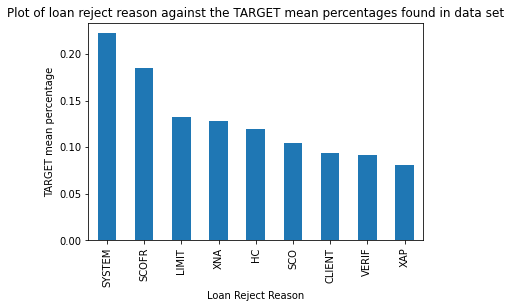

In [49]:
#analyzing customers' reject reason in the previous application; as seen customers who were rejected loan by identifying the reason as System has defaulted the most.
ad.groupby("CODE_REJECT_REASON")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of loan reject reason against the TARGET mean percentages found in data set')
plt.xlabel('Loan Reject Reason')
plt.ylabel('TARGET mean percentage')
plt.plot


In [ ]:
ad.columns

<function matplotlib.pyplot.plot>

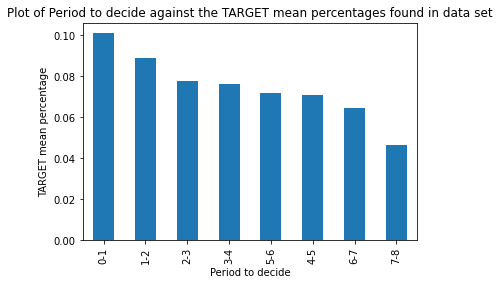

In [50]:
#analyzing the time gap customers took before applying for the previous loan application; as observed customers who took the shortest time before applying for the previous loan have defaulted on the current loan
ad.groupby("YEARS_DECISION_GROUP")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Period to decide against the TARGET mean percentages found in data set')
plt.xlabel('Period to decide')
plt.ylabel('TARGET mean percentage')
plt.plot



<function matplotlib.pyplot.plot>

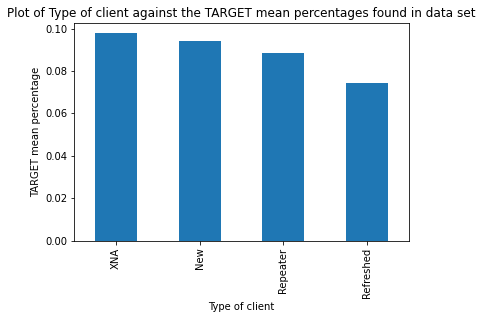

In [51]:
#analyzing whether the client was new, repeater, or refreshed while applying for previous loan; it is noticed that 'new' clients of previous application is highest to have defaulted in current loan application
ad.groupby("NAME_CLIENT_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of Type of client against the TARGET mean percentages found in data set')
plt.xlabel('Type of client')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

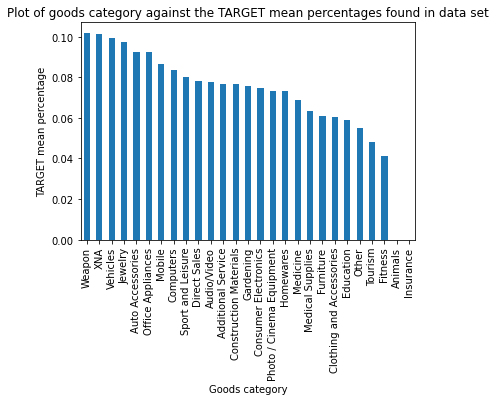

In [52]:
#analyzing the reason for makin the previous loan application; it is observed that customers who took the previous loan for purchasing weapon has defaulted the most in the current loan application, followed by Vehicle purchase, and Jewelery purchase.
ad.groupby("NAME_GOODS_CATEGORY")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of goods category against the TARGET mean percentages found in data set')
plt.xlabel('Goods category')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

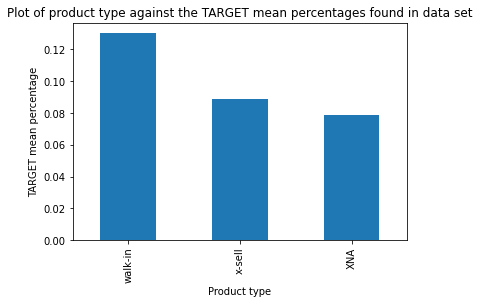

In [53]:
#analyzing the product type of previous loan; it is observed that customers who had made a walk-in to make a loan application have defaulted the most in the current loan application
ad.groupby("NAME_PRODUCT_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of product type against the TARGET mean percentages found in data set')
plt.xlabel('Product type')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

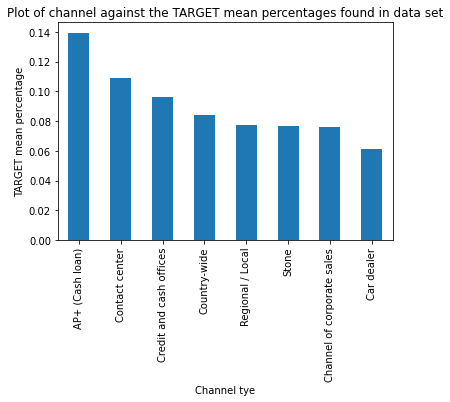

In [54]:
#analysing the channel type through which the customer was acquired during the previous loan application; it is noticed that AP + (Cash loan) channel acquired customers have defaulted the most in the present loan application
ad.groupby("CHANNEL_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of channel against the TARGET mean percentages found in data set')
plt.xlabel('Channel tye')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

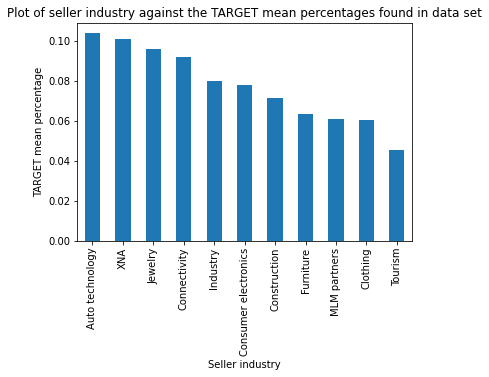

In [55]:
#sellers through whom customers who took a loan in the previous application are analyzed, and it is noticed that customers who took loans through the auto technology sellers in the previous application have defaulted the most in the present application.
ad.groupby("NAME_SELLER_INDUSTRY")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of seller industry against the TARGET mean percentages found in data set')
plt.xlabel('Seller industry')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

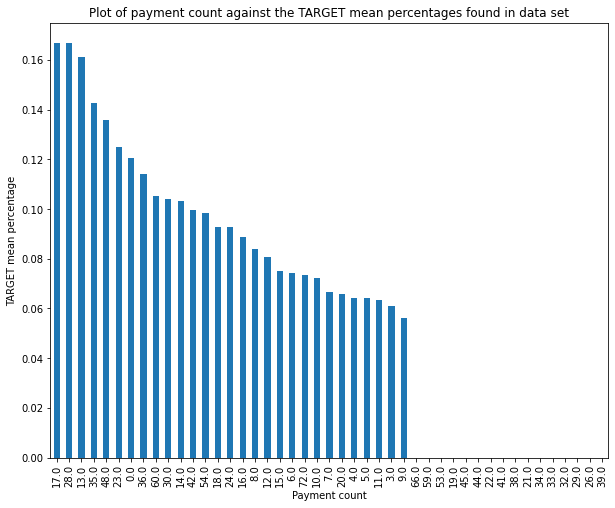

In [56]:
#analyzing the count of payment of prior loan when customer made application for previous loan; customers who are just past a year or so of previous payment count have defaulted on the current application.
plt.figure(figsize = [10,8])
ad.groupby("CNT_PAYMENT")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of payment count against the TARGET mean percentages found in data set')
plt.xlabel('Payment count')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

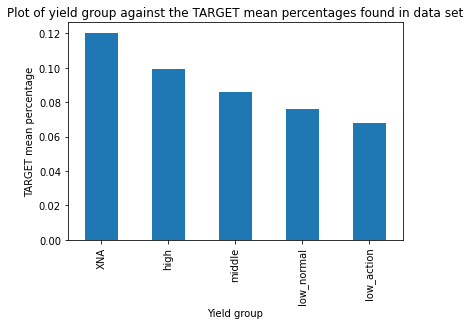

In [57]:
#analyzing the category of interest charged in previous application; customers who were charged high interest have defaulted on the current loan payment.
ad.groupby("NAME_YIELD_GROUP")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of yield group against the TARGET mean percentages found in data set')
plt.xlabel('Yield group')
plt.ylabel('TARGET mean percentage')
plt.plot


<function matplotlib.pyplot.plot>

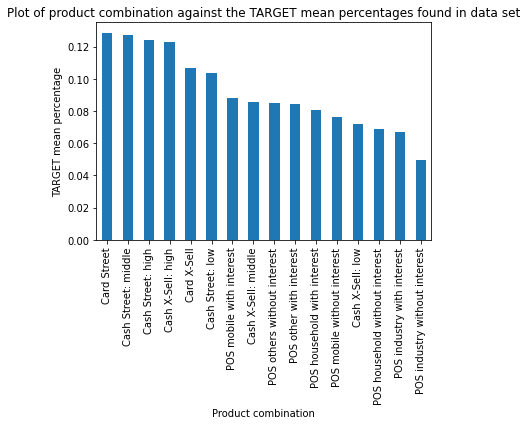

In [58]:
#analyzing product combination of previous loan application; customers of cash street in previous application have defaulted the most in current application, and so did customers who opted for cash street: middle.
ad.groupby("PRODUCT_COMBINATION")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.title('Plot of product combination against the TARGET mean percentages found in data set')
plt.xlabel('Product combination')
plt.ylabel('TARGET mean percentage')
plt.plot


###Multivariate Analysis of the clubbed data

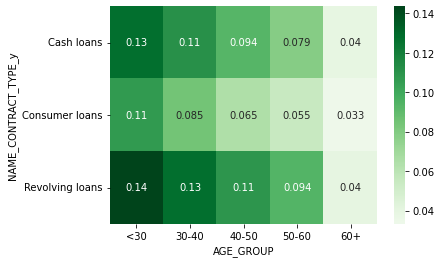

In [30]:
#analyzing loan type of previous application, and it is observed that customers of the age groups <30 and 30-40 of products like revolving loans and cash loans have defaulted the most in the current loan application.
res = pd.pivot_table(data=ad, index="NAME_CONTRACT_TYPE_y", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

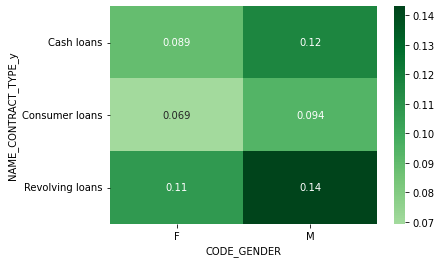

In [38]:
#analyzing type of previous loan and the present default in current loan among male and female customers; it is noticed that revolving loans in previous application has default by male and female customers in current application
res = pd.pivot_table(data=ad, index="NAME_CONTRACT_TYPE_y", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

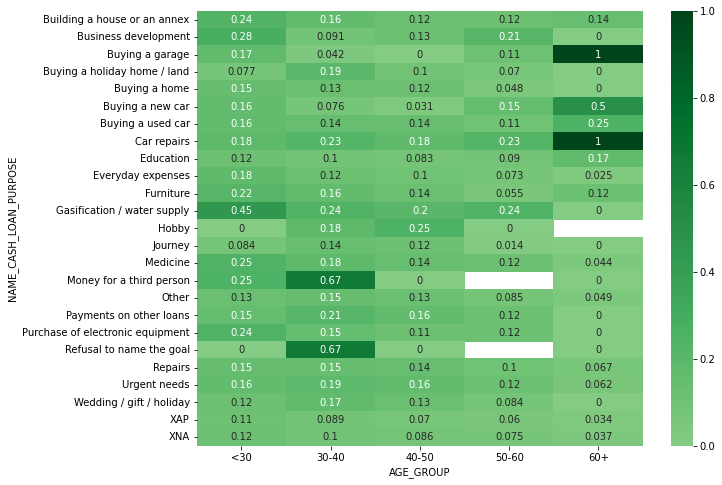

In [26]:
#analyzing purpose of previous loan application, and default in current loan payment across age groups; refusal to name the loan purpose, and money for third person in previous application have significant default in current application.
plt.figure(figsize = [10,8])
res = pd.pivot_table(data=ad, index="NAME_CASH_LOAN_PURPOSE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

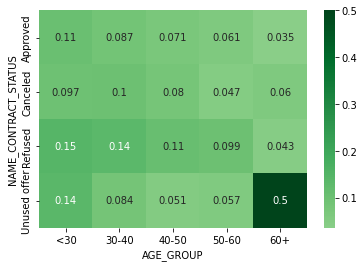

In [27]:
#analyzing the contract status of previous loan application among age groups to see defaults in current application; <30 age group sees a default in customers who had previously had unused offer or refused the offer.
res = pd.pivot_table(data=ad, index="NAME_CONTRACT_STATUS", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

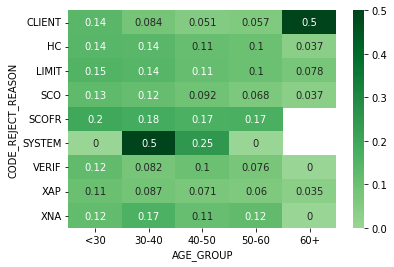

In [28]:
#analyzing how customers who were rejected previously were faring in the current loan application; it is noticed that customers across age groups that people who were rejected previously indeed default.
res = pd.pivot_table(data=ad, index="CODE_REJECT_REASON", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()


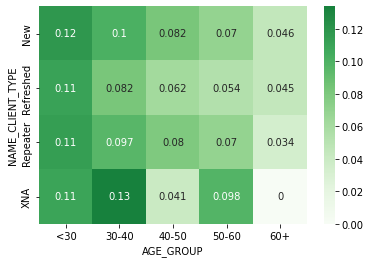

In [39]:
#analyzing the client type when making the previous loan application and see how they fare in the present loan application across age groups; it is observed that customers >30 default across client types.
res = pd.pivot_table(data=ad, index="NAME_CLIENT_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

In [6]:
ad.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_FLAG,FLAG_OWN_CAR_NUM,FLAG_OWN_REALTY_NUM,AGE,YEARS_EMPLOYED,AGE_GROUP,YEARS_EMPLOYED_GROUP,POPULATION_DENSITY_BINS,AMT_INCOME_TOTAL_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION,YEARS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.0,0.0,0.0,1.0,0,0,1,25,1,<30,<5,pop 4,200K-500K,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,1.0,0-1
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0.0,0.0,0.0,0.0,0,1,1,52,0,50-60,<5,pop 3,<100K,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,2.0,1-2


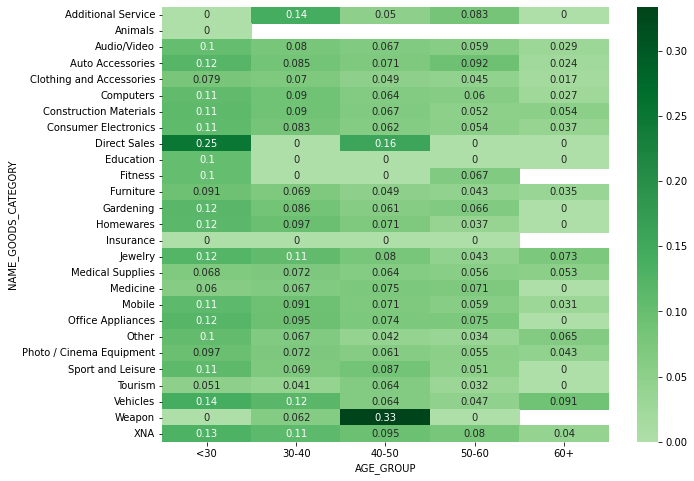

In [41]:
#analyzing goods category of previous loan application, and analyzing which age group defaulted in current loan; customers who purchased weapon in previous loan has defaulted in current loan. <30 age group is susceptible to default irrespective of goods categories in previous loan application.
plt.figure(figsize = [10,8])
res = pd.pivot_table(data=ad, index="NAME_GOODS_CATEGORY", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

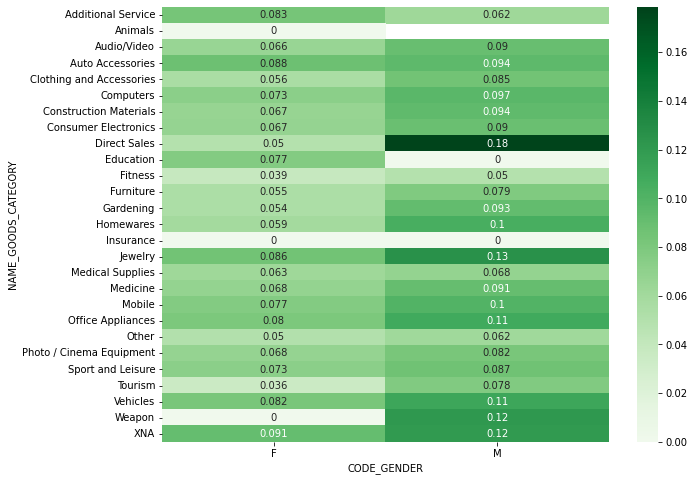

In [45]:
#analyzing goods cateory of previous application with gender of loan defaulters in current application; male customers are prone to default significantly and observed that purchase of weapon, vehicles, tourism previously have had defaults this time around.
plt.figure(figsize = [10,8])
res = pd.pivot_table(data=ad, index="NAME_GOODS_CATEGORY", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

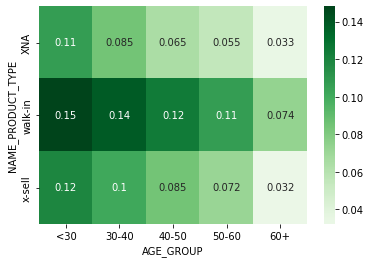

In [43]:
#analyzing product type of previous application and it is observed that across age groups customers who had previously made a walk-in have considerably defaulted in the current application.
res = pd.pivot_table(data=ad, index="NAME_PRODUCT_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

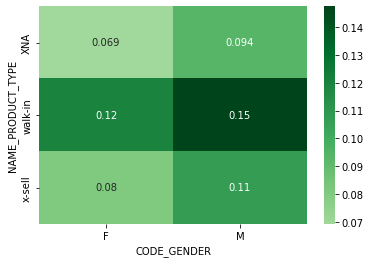

In [44]:
#analzying product type of previous application with customers who defaulted in current application; male customers have a greater tendency to default than females, and this too for walk-in product type of previous loan application.
res = pd.pivot_table(data=ad, index="NAME_PRODUCT_TYPE", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

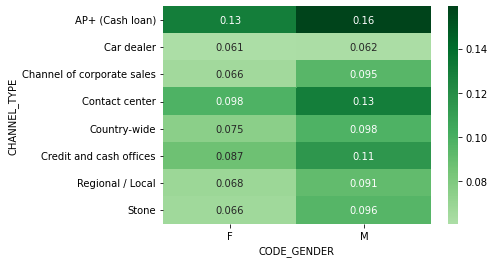

In [47]:
#analyzing channel type of customer making the previous loan application; male and female customers who had opted for AP+(Cash loan) have defaulted in the current loan application.
res = pd.pivot_table(data=ad, index="CHANNEL_TYPE", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

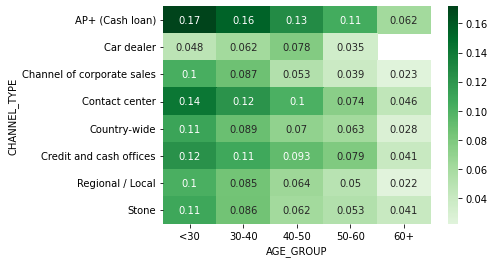

In [48]:
#analyzing channel type against age group of customers who have defaulted in current application; <30 age group customers have defaulted across the channel types, and 30-40 age group customers have defaulted who have previously opted for AP+(Cash loan)
res = pd.pivot_table(data=ad, index="CHANNEL_TYPE", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

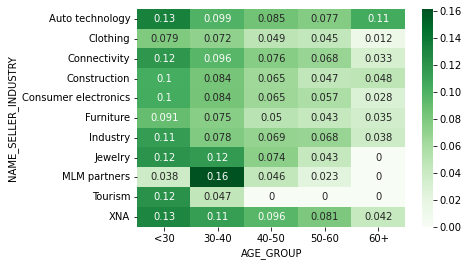

In [49]:
#analyzing seller industry of previous loan application against age group of customers who have defaulted in current application; <30 age group customers have defaulted across different seller industry; a spike is noticeable in 30-40 age group for the MLM partners seller industry in the previous loan application.
res = pd.pivot_table(data=ad, index="NAME_SELLER_INDUSTRY", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

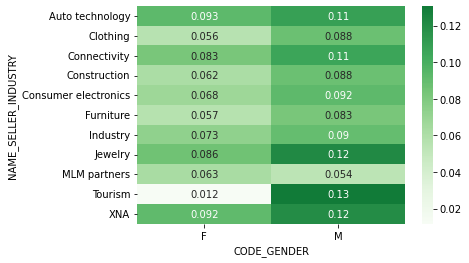

In [50]:
#analyzing gender against seller industry of previous loan application; noticeable that male customers are more prone to default.
res = pd.pivot_table(data=ad, index="NAME_SELLER_INDUSTRY", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

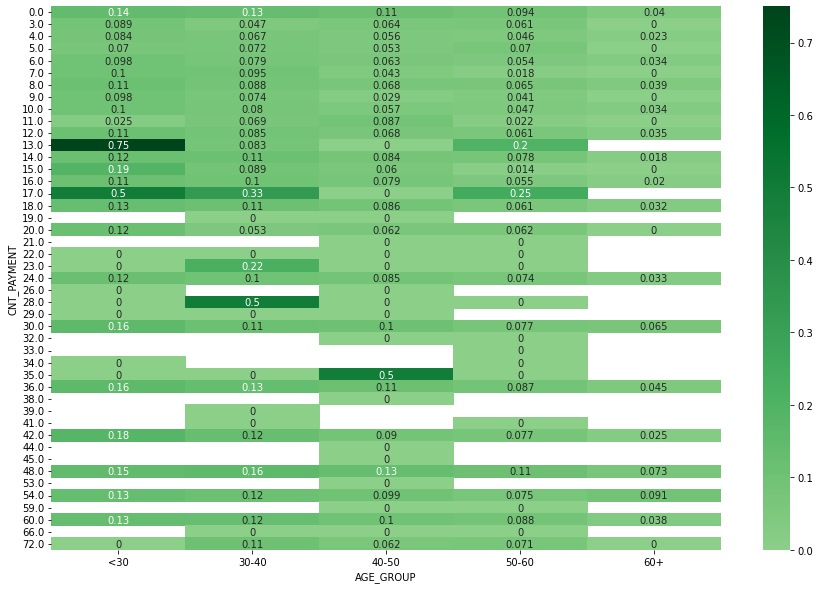

In [53]:
#analyzing payment count when making previous application against age groups of current application defaulters; <30 age group customers who had made more than 12 payments while making the previous loan application have defaulted in the current loan application.
plt.figure(figsize = [15,10])
res = pd.pivot_table(data=ad, index="CNT_PAYMENT", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

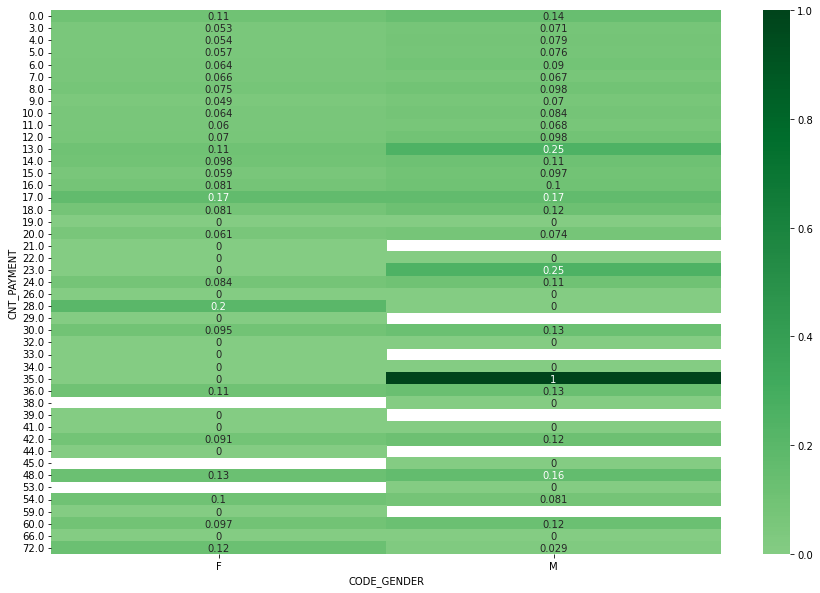

In [54]:
#analyzing payment count while making previous application again gender of defaulting customers of current application; male customers are susceptible to default in current application.
plt.figure(figsize = [15,10])
res = pd.pivot_table(data=ad, index="CNT_PAYMENT", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

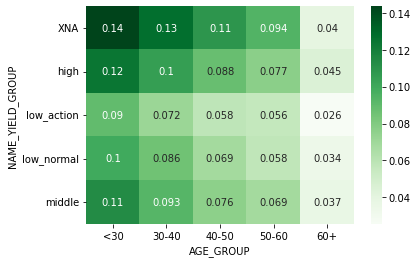

In [55]:
#analyzing the interest type of customers when they made the last application against age group of customers who defaulted in current application; <30 age group have defaulted who were paying high and middle interest in previous application; 30-40 age group have defaulted in the high interest category.
res = pd.pivot_table(data=ad, index="NAME_YIELD_GROUP", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

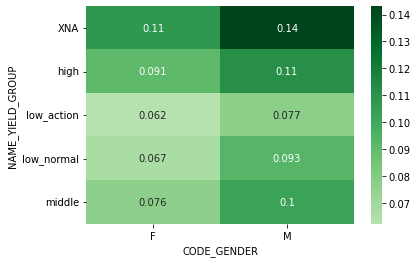

In [56]:
#analyzing interest rate of previous application against gender who have defaulted in current application; male customers paying high interest in previous application have defaulted in current application.
res = pd.pivot_table(data=ad, index="NAME_YIELD_GROUP", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

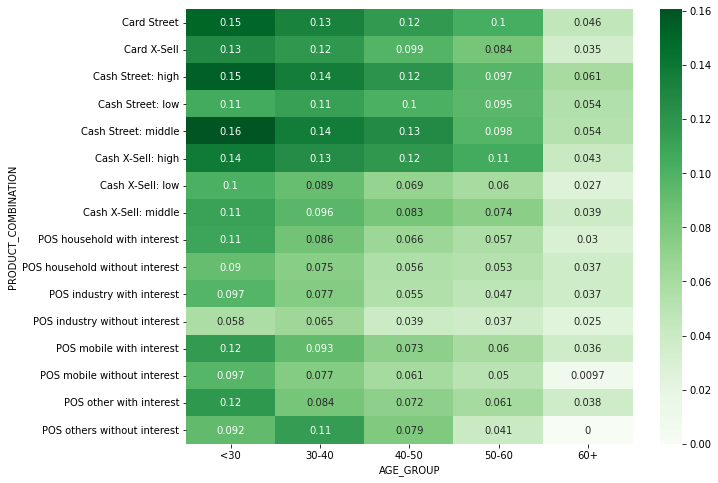

In [58]:
#analyzing product combination of previous application against age group of defaulting customers of current application; customers across age groups have defaulted who have previously opted for products like Card Street, Card X-Sell, Cash Street: high, Cash Street: low, Cash Street: middle, Cash X-Sell: high.
plt.figure(figsize = [10,8])
res = pd.pivot_table(data=ad, index="PRODUCT_COMBINATION", columns="AGE_GROUP", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()

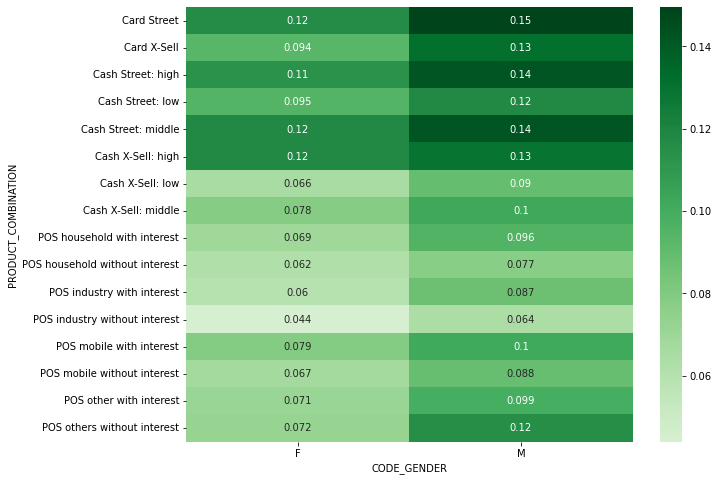

In [59]:
#analyzing product combination of previous application against gender of defaulters of current application; male customers have defaulted in a higher percentage in comparison to female customers for products like Card Street, Card X-Sell, Cash Street: high, Cash Street: middle, Cash X-Sell: high.
plt.figure(figsize = [10,8])
res = pd.pivot_table(data=ad, index="PRODUCT_COMBINATION", columns="CODE_GENDER", values="TARGET")
sns.heatmap(res, annot=True, cmap="Greens", center=0.084696)
plt.show()